# Lista 03 - Estrutura de Dados
##### Nome: Antonio Elimar Ximenes Oliveira
##### Matrícula: 584261

# Questão 1

In [2]:
import pandas as pd

### a) Ler o dataset fakeTelegram.BR_2022.csv

In [2]:
df = pd.read_csv(r'D:\10 - Materiais e Atividades disciplinas MDCC\1 - Atividades MDCC\Estrutura de Dados\fakeTelegram.BR_2022.csv')

In [3]:
# Exibe as 5 primeiras linhas
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637


In [4]:
len(df)

557586

### b) Remova os trava-zaps.

Como temos uma coluna chamada `trava_zap`, que é do tipo booleano, vamos, a princípio, verificar a quantidaade de "trava zap" e remover essas linhas.

In [5]:
# Contar a quantidade de True e False na coluna 'trava_zap'
contagem_trava_zap = df['trava_zap'].value_counts()

# Exibir o resultado
contagem_trava_zap

trava_zap
False    557570
True         16
Name: count, dtype: int64

In [6]:
# Mantém apenas as linhas onde 'trava_zap' é False (ou seja, remove os "trava-zaps")
df = df[df['trava_zap'] == False] # Mantém apenas as linhas onde 'trava_zap' é False (ou seja, remove os "trava-zaps")
df = df[df['trava_zap'] == False]

Também vou remover aquela mensagem automática relacionada ao TSE

In [7]:
df = df[df['text_content_anonymous'] != 
    "This community was blocked in Brazil following a decision of the Superior Electoral Court (TSE)."]

### c) Remover textos com menos de 5 palavras.

In [8]:
# Verifica se é um STR (Nan são removidos) e se tem mais de 5 palavras
df = df[df['text_content_anonymous'].apply(lambda x: isinstance(x, str) and len(x.split()) >= 5)]

In [9]:
print("Quantidade restante após remoção: ", len(df))

Quantidade restante após remoção:  321864


In [10]:
# Quantos valores distintos existem na coluna "usuario"
num_distintos = df["id_member_anonymous"].nunique()
print("Quantidade de valores distintos:", num_distintos)

Quantidade de valores distintos: 10677


### Analisando mensagens semelhantes

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# Vetorização TF-IDF com stopwords em português
stopwords_pt = stopwords.words('portuguese')
vectorizer = TfidfVectorizer(stop_words=stopwords_pt)

# Preencher textos vazios
df['text_content_anonymous'] = df['text_content_anonymous'].fillna('')

# Aplicar TF-IDF
X_tfidf = vectorizer.fit_transform(df['text_content_anonymous'])

# Agrupamento com DBSCAN baseado em similaridade de texto
# DBSCAN exige uma distância: usamos (1 - similaridade do cosseno)
db = DBSCAN(eps=0.1, min_samples=2, metric='cosine')
clusters = db.fit_predict(X_tfidf)

df['cluster_mensagem'] = clusters

# Criar coluna de quantidade de compartilhamentos (mensagens semelhantes no mesmo grupo)
df['qtd_compartilhamentos'] = df.groupby('cluster_mensagem')['cluster_mensagem'].transform('count')

# Converter data da mensagem para datetime
df['date_message'] = pd.to_datetime(df['date_message'], errors='coerce')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elimar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Como o cluster -1 indica mensagens únicas o qtd_compartilhamentos colocamos como 1.

In [ ]:
# Se cluster_mensagem == -1, define qtd_compartilhamentos = 1
df.loc[df["cluster_mensagem"] == -1, "qtd_compartilhamentos"] = 1

In [ ]:
df[["text_content_anonymous", "cluster_mensagem", "qtd_compartilhamentos"]].head(9)

,text_content_anonymous,cluster_mensagem,qtd_compartilhamentos
0,Então é Fato Renato o áudio que eu ouvi no wha...,-1,1
1,"Saiu no YouTube do presidente a 8 horas atrás,...",-1,1
2,"É isso, nossa parte já foi quase toda feita. N...",-1,1
3,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,-1,1
4,Kķkkkkk to rindo até agora....Quem disse q ia ...,-1,1
5,*SE ALGUÉM TE PERGUNTAR O QUE FOI QUE BOLSONAR...,0,91
6,O Deputado Federal pelo NOVO e que foi candida...,1,6
7,"Saiam desse grupo amigos bolsonaristas, urgent...",2,20
8,Gazprom da Rússia: Retomamos o fornecimento de...,-1,1


Como podemos ver abaixo, com o print do cluster 2, mensagens que seriam consideradas diferentes em uma comparação simples de igualdade agora, pelo identificador do cluster, podem ser reconhecidas como semelhantes.

In [ ]:
mensagens_cluster_2 = df[df["cluster_mensagem"] == 2]["text_content_anonymous"]

mensagens_semelhantes = mensagens_cluster_2.unique()

print(f"\n🔹 Mensagens semelhantes no cluster 2 ({len(mensagens_cluster_2)} mensagens total): {len(mensagens_semelhantes)} únicas")
for msg in mensagens_semelhantes:
    print("-", msg)


🔹 Mensagens semelhantes no cluster 2 (20 mensagens total): 6 únicas
- Saiam desse grupo amigos bolsonaristas, urgente e tirem seus companheiros, esse grupo é de lulistas pegando os dados de vcs e votarem no lugar de vcs, não acreditam em nada que eles postando é tudo fake, esse grupo é fake, avisem a todos e saiam daqui e avisem o máximo de pessoas pra não mandarem comprovante da votação  pq falei com CARLA ZAMBELLE E ELA DISSE QUE ESSES GRUPOS FORAM FEITOS PRA NOS DIVIDIR E PEGAR DADOS FOS ELEITORES DO BOLSONARO, POR FAVOR PARRM AMIGOS, NÃO PREJUDIQUEM NOSSO CAPITÃO, NÃO DRIXEM ELEA NOS DERROTAREM, NÃO ACREDITEM EM MENTIRAS E FAKE NEWS! Grupo se fingindo de bolsonaristas, avisem seus familiares para não entrarem e não mandarem comprovante nenhum, é tudo mentira esses links de pedir comprovante, são petistas pegando os nossos dados. Socorroooooo não façam isso, avisem amigos pra ter cuidado com fakes e links desses grupos, estou entrando nos grupos avisando, me ajudem!! ELES ESTAO NES

Criando as colunas is_viral e is_misinfo, para indicar se a mensagem é viral e se tem desinformação

In [ ]:
# Calcula o limite
limite_viral = df["qtd_compartilhamentos"].quantile(0.90)

# Cria coluna para viralidade
df["is_viral"] = df["qtd_compartilhamentos"].fillna(0) > limite_viral

# Cria coluna para desinformação (score >= 0.7)
df["is_misinfo"] = df["score_misinformation"].fillna(0) >= 0.7

# Conferindo
print("Limite usado para viralidade:", limite_viral)
df[["qtd_compartilhamentos", "score_misinformation", "is_viral", "is_misinfo"]].head(10)

Limite usado para viralidade: 31.0


,qtd_compartilhamentos,score_misinformation,is_viral,is_misinfo
0,1,NaN,False,False
1,1,NaN,False,False
2,1,0.157242,False,False
3,1,NaN,False,False
4,1,0.197813,False,False
5,91,0.974258,True,True
6,6,0.035876,False,False
7,20,0.934309,False,True
8,1,NaN,False,False
9,20,0.999971,False,True


In [ ]:
# Contagem de mensagens virais
print("🔹 Quantidade de mensagens virais vs não virais:")
print(df["is_viral"].value_counts())

# Contagem de mensagens de desinformação
print("\n🔹 Quantidade de mensagens com desinformação vs sem:")
print(df["is_misinfo"].value_counts())

🔹 Quantidade de mensagens virais vs não virais:
is_viral
False    290268
True      31596
Name: count, dtype: int64

🔹 Quantidade de mensagens com desinformação vs sem:
is_misinfo
False    297110
True      24754
Name: count, dtype: int64


In [ ]:
# Salvando o DataFrame após o tratamento, contendo as colunas:
# - cluster_mensagem: identificador do cluster da mensagem
# - is_viral: indicador se a mensagem foi classificada como viral
# - is_desinformacao: indicador se a mensagem contém desinformação
df.to_csv("mensagens_cluster_90_viral_desinfo.csv", index=False)

### d) Monte os grafos solicitados a seguir.

In [2]:
import pandas as pd

df_similaridade = pd.read_csv(r'D:\10 - Materiais e Atividades disciplinas MDCC\1 - Atividades MDCC\Estrutura de Dados\mensagens_cluster_90_viral_desinfo.csv', parse_dates=["date_message"])

In [3]:
df_similaridade[:2]

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,score_misinformation,id_message,message_type,messenger,media_name,media_md5,cluster_mensagem,qtd_compartilhamentos,is_viral,is_misinfo
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,NaN,16385,Texto,telegram,NaN,NaN,-1,1,False,False
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",...,NaN,16386,Texto,telegram,NaN,NaN,-1,1,False,False


Utilizando as ferramentas:

- 1. NetworkX (https://networkx.org/)
- 2. Gephi (http://gephi.org)

#### Criando os grafos com a ferramenta **NetworkX**

In [ ]:
!pip install python-louvain

In [13]:
!pip install networkx


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Elimar\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [35]:
import pandas as pd
import numpy as np
import networkx as nx
from itertools import combinations
from collections import defaultdict
import community.community_louvain as community_louvain
from networkx.algorithms.community import quality as q

In [13]:
def export_gexf(G, path):
    """Exporta grafo para Gephi (.gexf)."""
    nx.write_gexf(G, path)
    print(f"Exportado {path}")

def communities_louvain(G, weight='weight'):
    """Roda Louvain e retorna partição dict e lista de comunidades."""
    partition = community_louvain.best_partition(G.to_undirected(), weight=weight)
    # converter para lista de conjuntos
    inv = defaultdict(set)
    for node, com in partition.items():
        inv[com].add(node)
    communities = list(inv.values())
    return partition, communities

def evaluate_partition(G, communities):
    """
    Calcula métricas de qualidade de partição:
    - modularity
    - coverage
    - performance
    Usando as funções do módulo 'quality' do NetworkX.
    """
    G_undirected = G.to_undirected()  # Métricas usam grafos não direcionados
    resultados = {}

    # Modularity
    try:
        resultados["modularity_nx"] = q.modularity(G_undirected, communities, weight="weight")
    except Exception as e:
        print(f"[!] Erro ao calcular modularity: {e}")
        resultados["modularity_nx"] = None

    # Coverage e Performance (retornam juntos)
    try:
        coverage, performance = q.partition_quality(G_undirected, communities)
        resultados["coverage"] = coverage
        resultados["performance"] = performance
    except Exception as e:
        print(f"[!] Erro ao calcular coverage/performance: {e}")
        resultados["coverage"] = None
        resultados["performance"] = None

    return resultados

In [14]:
def build_stn(df, cluster_col="cluster_mensagem", user_col="id_member_anonymous", nome="STN"):
    G = nx.DiGraph()
    for cluster, sub in df.groupby(cluster_col):
        usuarios = sub[user_col].dropna().unique().tolist()
        # todos pares ordenados (direcionado), ou você pode manter apenas undirected/projected
        for u1, u2 in combinations(usuarios, 2):
            # direção dupla para manter coerência (pode ser convertida em não-dirigido)
            if G.has_edge(u1, u2):
                G[u1][u2]['weight'] += 1
            else:
                G.add_edge(u1, u2, weight=1)
            if G.has_edge(u2, u1):
                G[u2][u1]['weight'] += 1
            else:
                G.add_edge(u2, u1, weight=1)
    print(f"{nome}: nodes={G.number_of_nodes()}, edges={G.number_of_edges()}")
    return G

In [15]:
def build_rrn(df, delta_seconds=3600, cluster_col="cluster_mensagem",
              time_col="date_message", user_col="id_member_anonymous", nome="RRN"):
    G = nx.DiGraph()
    # garantir ordenação por cluster e tempo
    df_sorted = df.dropna(subset=[cluster_col, time_col, user_col]).sort_values(time_col)
    for cluster, sub in df_sorted.groupby(cluster_col):
        # lista de (time, user)
        events = sub[[time_col, user_col]].dropna().values
        # events already sorted by time due to groupby from sorted df
        for i in range(len(events)):
            ti, ui = events[i]
            for j in range(i+1, len(events)):
                tj, uj = events[j]
                if (tj - ti).total_seconds() <= delta_seconds:
                    # cria aresta ui -> uj
                    if ui == uj:
                        continue
                    if G.has_edge(ui, uj):
                        G[ui][uj]['weight'] += 1
                    else:
                        G.add_edge(ui, uj, weight=1)
                else:
                    # eventos seguintes fora da janela -> break (assumindo ordenado)
                    break
    print(f"{nome}: nodes={G.number_of_nodes()}, edges={G.number_of_edges()}")
    return G

In [16]:
def combine_graphs(G_rrn, G_stn, alpha=1.0, beta=1.0, mode="sum"):
    G = nx.DiGraph()
    nodes = set(G_rrn.nodes()) | set(G_stn.nodes())
    G.add_nodes_from(nodes)
    # sumariza pesos
    for u,v,data in list(G_rrn.edges(data=True)):
        G.add_edge(u, v, weight=beta * data.get('weight',1))
    for u,v,data in list(G_stn.edges(data=True)):
        if G.has_edge(u,v):
            if mode == "sum":
                G[u][v]['weight'] += alpha * data.get('weight',1)
            elif mode == "intersection":
                # manter somente se já existia
                pass
        else:
            if mode in ("sum","union"):
                G.add_edge(u, v, weight=alpha * data.get('weight',1))
    # para intersection: filtrar arestas que não estavam em ambos
    if mode == "intersection":
        edges_to_remove = []
        for u,v in G.edges():
            if not (G_rrn.has_edge(u,v) and G_stn.has_edge(u,v)):
                edges_to_remove.append((u,v))
        G.remove_edges_from(edges_to_remove)
    return G

In [28]:
from networkx.algorithms import bipartite
import networkx as nx
import pandas as pd

def build_bipartite_projection(df, cluster_col="cluster_mensagem", user_col="id_member_anonymous", nome="bipartite"):
    # remove linhas inválidas
    df = df.dropna(subset=[cluster_col, user_col])

    B = nx.Graph(name=nome)

    # Cria grafo bipartido (usuários <-> clusters)
    for cluster, sub in df.groupby(cluster_col):
        mnode = f"m_{cluster}"
        B.add_node(mnode, bipartite="message", cluster=cluster)
        for u, count in sub[user_col].value_counts().items():
            unode = f"u_{u}"
            B.add_node(unode, bipartite="user", user=u)
            B.add_edge(unode, mnode, weight=count)

    # Projeção: usuários conectados por mensagens comuns
    users = [n for n, d in B.nodes(data=True) if d["bipartite"] == "user"]
    P = bipartite.weighted_projected_graph(B, users)  # <<< aqui está o ajuste

    # Cria grafo simples com IDs puros
    G = nx.Graph()
    for u, v, data in P.edges(data=True):
        uid, vid = u.replace("u_", ""), v.replace("u_", "")
        G.add_edge(uid, vid, weight=data.get("weight", 1))

    return B, G

In [30]:
def coordination_scores(df, cluster_col="cluster_mensagem", user_col="id_member_anonymous", time_col="date_message",
                        delta_seconds=3600, gamma=1.0):
    # para cada cluster, obtemos lista de events (time,user). Calcula contribuição por par.
    pair_scores = defaultdict(float)
    cluster_counts = df.groupby(cluster_col)[user_col].nunique().to_dict()
    for cluster, sub in df.dropna(subset=[cluster_col,user_col]).groupby(cluster_col):
        users = sub[user_col].unique().tolist()
        n_users = cluster_counts.get(cluster, len(users))
        if n_users <= 1:
            continue
        inv_pop = 1.0 / np.log(1 + n_users)  # penaliza mensagens populares
        events = sub[[time_col, user_col]].sort_values(time_col).values
        # marcar pares que ocorreram dentro da janela
        for i in range(len(events)):
            ti, ui = events[i]
            for j in range(i+1, len(events)):
                tj, uj = events[j]
                if ui == uj: 
                    continue
                # temporal bonus
                temporal = 1.0
                if (tj - ti).total_seconds() <= delta_seconds:
                    temporal += gamma
                pair_scores[(ui,uj)] += inv_pop * temporal
                pair_scores[(uj,ui)] += inv_pop * temporal
    # retornar DataFrame
    out = pd.DataFrame([{"u":k[0],"v":k[1],"score":s} for k,s in pair_scores.items()])
    return out.sort_values("score", ascending=False)

In [32]:
def pipeline_and_evaluate(df):
    # Filtrar clusters válidos (como fez)
    df_clusters = df[df["cluster_mensagem"] != -1].copy()

    # 1) Geral
    df_geral = df_clusters
    G_stn_geral = build_stn(df_geral, nome="STN Geral")
    G_rrn_geral = build_rrn(df_geral, delta_seconds=3600, nome="RRN Geral")
    G_comb_geral = combine_graphs(G_rrn_geral, G_stn_geral, alpha=1.0, beta=1.0, mode="sum")
    B_geral, G_bip_geral = build_bipartite_projection(df_geral)

    # 2) Virais
    df_virais = df_clusters[df_clusters["is_viral"] == True]
    G_stn_viral = build_stn(df_virais, nome="STN Viral")
    G_rrn_viral = build_rrn(df_virais, delta_seconds=3600, nome="RRN Viral")
    G_comb_viral = combine_graphs(G_rrn_viral, G_stn_viral, mode="sum")
    B_viral, G_bip_viral = build_bipartite_projection(df_virais)

    # 3) Desinformação
    df_mis = df_clusters[df_clusters["is_misinfo"] == True]
    G_stn_mis = build_stn(df_mis, nome="STN Misinfo")
    G_rrn_mis = build_rrn(df_mis, delta_seconds=3600, nome="RRN Misinfo")
    G_comb_mis = combine_graphs(G_rrn_mis, G_stn_mis, mode="sum")
    B_mis, G_bip_mis = build_bipartite_projection(df_mis)

    # Avaliar: para cada grafo, rodar Louvain e métricas
    results = []
    for label, G in [
        ("Geral_STN", G_stn_geral), ("Geral_RRN", G_rrn_geral), ("Geral_COMB", G_comb_geral), ("Geral_BIP", G_bip_geral),
        ("Viral_STN", G_stn_viral), ("Viral_RRN", G_rrn_viral), ("Viral_COMB", G_comb_viral), ("Viral_BIP", G_bip_viral),
        ("Misinfo_STN", G_stn_mis), ("Misinfo_RRN", G_rrn_mis), ("Misinfo_COMB", G_comb_mis), ("Misinfo_BIP", G_bip_mis)
    ]:
        # pular grafos vazios
        if G.number_of_nodes() == 0:
            results.append({"graph":label, "nodes":0, "edges":0, "n_communities":0, **{"modularity_nx":None,"coverage":None,"performance":None}})
            continue
        partition, communities = communities_louvain(G)
        evals = evaluate_partition(G, communities)
        results.append({
            "graph": label,
            "nodes": G.number_of_nodes(),
            "edges": G.number_of_edges(),
            "n_communities": len(communities),
            **evals
        })
    return pd.DataFrame(results)


In [36]:
pipeline_and_evaluate(df_similaridade)

STN Geral: nodes=2826, edges=88502
RRN Geral: nodes=1976, edges=11266
STN Viral: nodes=1412, edges=69894
RRN Viral: nodes=1121, edges=7539
STN Misinfo: nodes=1093, edges=29286
RRN Misinfo: nodes=713, edges=2341


,graph,nodes,edges,n_communities,modularity_nx,coverage,performance
0,Geral_STN,2826,88502,133,0.445814,0.568981,0.913058
1,Geral_RRN,1976,11266,127,0.699947,0.699006,0.847158
2,Geral_COMB,2826,88502,130,0.581552,0.590360,0.880788
3,Geral_BIP,2826,44251,132,0.442606,0.568349,0.911406
4,Viral_STN,1412,69894,30,0.482052,0.606061,0.926411
5,Viral_RRN,1121,7539,69,0.709457,0.790646,0.835721
6,Viral_COMB,1412,69894,27,0.633422,0.693107,0.809423
7,Viral_BIP,1412,34947,30,0.487879,0.643689,0.908773
8,Misinfo_STN,1093,29286,39,0.538648,0.676432,0.896005
9,Misinfo_RRN,713,2341,70,0.723425,0.787008,0.939164


# Rascunhos

In [4]:
from itertools import combinations
import networkx as nx
import pandas as pd


# ============================================================
# Função auxiliar para criar grafos
# ============================================================

def criar_grafo(df, nome="Grafo"):
    """
    Cria um grafo direcionado e valorado a partir de clusters de mensagens (Mensagens Similares).
    """
    G = nx.DiGraph()
    
    for grupo, sub_df in df.groupby("cluster_mensagem"):
        usuarios = sub_df["id_member_anonymous"].dropna().unique()
        
        # Gera todos os pares possíveis de usuários no mesmo cluster
        for u1, u2 in combinations(usuarios, 2):
            if G.has_edge(u1, u2):
                G[u1][u2]['weight'] += 1
            else:
                G.add_edge(u1, u2, weight=1)
    
    print(f"\n🔹 {nome} criado com sucesso!")
    print(f"   • Nós: {G.number_of_nodes()}")
    print(f"   • Arestas: {G.number_of_edges()}")
    print(f"   • Densidade: {nx.density(G):.6f}")
    print(f"   • Exemplo de pesos (primeiras 5 arestas):")
    for u, v, data in list(G.edges(data=True))[:5]:
        print(f"     {u} -> {v} | peso = {data['weight']}")
        
    return G

Filtrando os DataFrames de interesse e Gerando cada um dos grafos

- **Criando Grafo Geral**

In [16]:
# Mensagens gerais (todos os clusters válidos), os indicados com -1 são de mensagens únicas
cluster_geral = df_similaridade[df_similaridade["cluster_mensagem"] != -1]

# Criando Grafo Geral
G_geral = criar_grafo(cluster_geral, "Grafo Geral")


🔹 Grafo Geral criado com sucesso!
   • Nós: 2826
   • Arestas: 46068
   • Densidade: 0.005770
   • Exemplo de pesos (primeiras 5 arestas):
     3b685d44ff197b98d7c9e99b8f6b5281 -> 71dc66cd12139bc58079bfe1b90431d0 | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> 6d664615e04318ab74a695fe5dd4f49e | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> f170ab306107446e54eeb8d090e43986 | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> b67d47443eb69f2d2c52ba746df7f7c3 | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> 4fc03afa6312748bcf22f405732241da | peso = 1


- **Criando Grafo Virais**

In [17]:
#  Mensagens virais
cluster_virais = df_similaridade[
    (df_similaridade["cluster_mensagem"] != -1) & (df_similaridade["is_viral"])
]

G_viral = criar_grafo(cluster_virais, "Grafo de Virais")


🔹 Grafo de Virais criado com sucesso!
   • Nós: 1412
   • Arestas: 35649
   • Densidade: 0.017893
   • Exemplo de pesos (primeiras 5 arestas):
     3b685d44ff197b98d7c9e99b8f6b5281 -> 71dc66cd12139bc58079bfe1b90431d0 | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> 6d664615e04318ab74a695fe5dd4f49e | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> f170ab306107446e54eeb8d090e43986 | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> b67d47443eb69f2d2c52ba746df7f7c3 | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> 4fc03afa6312748bcf22f405732241da | peso = 1


- **Criando Grafo Desinformação**

In [18]:
# Mensagens de desinformação
cluster_misinfo = df_similaridade[
    (df_similaridade["cluster_mensagem"] != -1) & (df_similaridade["is_misinfo"])
]

G_desinfo = criar_grafo(cluster_misinfo, "Grafo de Desinformação")


🔹 Grafo de Desinformação criado com sucesso!
   • Nós: 1093
   • Arestas: 14905
   • Densidade: 0.012488
   • Exemplo de pesos (primeiras 5 arestas):
     3b685d44ff197b98d7c9e99b8f6b5281 -> 6d664615e04318ab74a695fe5dd4f49e | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> f170ab306107446e54eeb8d090e43986 | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> 4fc03afa6312748bcf22f405732241da | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> 530db5d239f941ef44aae189f20b44a2 | peso = 1
     3b685d44ff197b98d7c9e99b8f6b5281 -> 3b3735bfb4930c0405fb1eeb7c3c97f1 | peso = 1


- Exportando cada um dos Grafos Gerados

In [19]:
# Exportar para Gephi (formato .gexf)
nx.write_gexf(G_geral, "grafo_geral.gexf")
nx.write_gexf(G_desinfo, "grafo_desinformacao.gexf")
nx.write_gexf(G_viral, "grafo_viral.gexf")

print("\n✅ Grafos exportados com sucesso para arquivos .gexf!")


✅ Grafos exportados com sucesso para arquivos .gexf!


#### Utilize (se necessário, implemente) os seguintes algoritmos de detecção de comunidades:
- Girvan-Newman
- Edge Betweenness Partition
- Edge Current Flow Betweenness Partition
- K-clique Communities
- Greedy Modularity Communities
- Naïve Greedy Modularity Communities
- Lukes Partitioning
- Label Propagation Communities
- Fast Label Propagation Communities
- Louvain Communities
- Asynchronous Fluid Communities

Para cada um dos três cenários investigados, avalie os algoritmos utilizados por meio das
seguintes métricas de qualidade:
- Modularity
- Partition Quality

In [5]:
# Leitura dos grafos salvos
G_geral = nx.read_gexf("grafo_geral.gexf")
G_desinfo = nx.read_gexf("grafo_desinformacao.gexf")
G_viral = nx.read_gexf("grafo_viral.gexf")

Para cada algoritmo aplicado aos grafos, são calculadas as seguintes métricas:

- **Número de comunidades (`n_communities`)**: quantidade de comunidades identificadas pelo algoritmo no grafo.

- **Modularidade (`modularity`)**: mede o quão bem a divisão em comunidades reflete a estrutura interna do grafo. Valores próximos a 1 indicam que há muitas conexões dentro das comunidades e poucas entre elas, o que sugere uma divisão bem definida.

- **Cobertura da partição (`partition_coverage`)**: representa a fração dos vértices conectados a outros vértices dentro da mesma comunidade. Valores mais altos indicam que a maioria das conexões ocorre dentro das comunidades detectadas.

- **Desempenho da partição (`partition_performance`)**: avalia a qualidade da partição considerando tanto as conexões internas às comunidades quanto as conexões inexistentes entre comunidades diferentes. Valores maiores indicam melhor separação.

Essas métricas são usadas para comparar os algoritmos entre si e identificar quais produzem as melhores partições em termos estruturais.

In [ ]:
from networkx.algorithms.community import quality as q

def modularity(G, communities):
    # Usa o weight da aresta
    return q.modularity(G, communities, weight='weight')

def partition_quality(G, communities):
    # returns (coverage, performance)
    return q.partition_quality(G, communities)

##### Implementação de cada um dos algorítmos de detecção de comunidades:

In [ ]:
# Girvan-Newman
def run_girvan_newman_best(G, max_communities=10):
    try:
        Gu = G.to_undirected()
        gen = nx.algorithms.community.centrality.girvan_newman(Gu)
        best = None
        best_mod = -1.0
        for i, comp in enumerate(gen):
            comps = [set(c) for c in comp]
            if len(comps) > max_communities:
                break
            mod = modularity(Gu, comps)
            if mod > best_mod:
                best_mod = mod
                best = comps
        if best is None:
            return ([], "Girvan-Newman não encontrou partição (graph muito pequeno?)")
        return (best, f"Girvan-Newman: melhor nível com modularity={best_mod:.4f}")
    except Exception as e:
        return ([], f"Erro Girvan-Newman: {e}")

# Edge Betweenness Partition
def run_edge_betweenness_partition(G, k=None):
    try:
        return run_girvan_newman_best(G, max_communities=k or 10)
    except Exception as e:
        return ([], f"Erro Edge Betweenness: {e}")

# Edge Current Flow Betweenness Partition
def run_current_flow_betweenness_partition(G, max_communities=10):
    try:
        Gu = G.to_undirected()
        if hasattr(nx, "edge_current_flow_betweenness_centrality"):
            cf_func = nx.edge_current_flow_betweenness_centrality
        elif hasattr(nx, "current_flow_edge_betweenness_centrality"):
            cf_func = nx.current_flow_edge_betweenness_centrality
        else:
            return ([], "NetworkX não possui função de current flow betweenness disponível.")
        
        def most_valuable_edge_CF(g):
            cb = cf_func(g, weight='weight')
            return max(cb.items(), key=lambda x: x[1])[0]
        
        gen = nx.algorithms.community.centrality.girvan_newman(Gu, most_valuable_edge=most_valuable_edge_CF)
        best = None; best_mod=-1.0
        for comp in gen:
            comps = [set(c) for c in comp]
            mod = modularity(Gu, comps)
            if mod > best_mod:
                best_mod = mod; best = comps
            if len(comps) > max_communities:
                break
        if best is None:
            return ([], "Current-flow GN não encontrou partição.")
        return (best, f"Current Flow Betweenness via GN, best modularity={best_mod:.4f}")
    except Exception as e:
        return ([], f"Erro Current Flow: {e}")

# K-clique Communities
def run_k_clique(G, k=3):
    try:
        Gu = G.to_undirected()
        comps = list(nx.algorithms.community.k_clique_communities(Gu, k))
        return [set(c) for c in comps], f"K-Clique (k={k}) retornou {len(comps)} comunidades"
    except Exception as e:
        return ([], f"Erro K-Clique: {e}")

# Greedy Modularity Communities
def run_greedy_modularity(G):
    try:
        Gu = G.to_undirected()
        comps = list(nx.algorithms.community.greedy_modularity_communities(Gu, weight='weight'))
        return [set(c) for c in comps], f"Greedy Modularity retornou {len(comps)} comunidades"
    except Exception as e:
        return ([], f"Erro Greedy: {e}")

# Naïve Greedy Modularity Communities
def run_naive_greedy_modularity(G):
    try:
        Gu = G.to_undirected()
        comps = list(nx.algorithms.community.naive_greedy_modularity_communities(Gu, weight='weight'))
        return [set(c) for c in comps], f"Naive Greedy Modularity retornou {len(comps)} comunidades"
    except Exception as e:
        return ([], f"Erro Naive Greedy: {e}")

# Lukes Partitioning
def run_lukes_partitioning(G, max_size=100):
    try:
        Gu = G.to_undirected()
        comps = list(nx.algorithms.community.lukes_partitioning(Gu, max_size=max_size))
        return [set(c) for c in comps], f"Lukes Partitioning retornou {len(comps)} comunidades (max_size={max_size})"
    except Exception as e:
        return ([], f"Erro Lukes: {e}")

# Label Propagation Communities
def run_label_propagation(G):
    try:
        Gu = G.to_undirected()
        comps = list(nx.algorithms.community.label_propagation_communities(Gu))
        return [set(c) for c in comps], f"Label Propagation retornou {len(comps)} comunidades"
    except Exception as e:
        return ([], f"Erro Label Propagation: {e}")

# Fast Label Propagation Communities
def run_fast_label_propagation(G):
    try:
        Gu = G.to_undirected()
        comps = list(nx.algorithms.community.asyn_lpa_communities(Gu, weight='weight'))
        return [set(c) for c in comps], f"Fast (Async) Label Propagation retornou {len(comps)} comunidades"
    except Exception as e:
        return ([], f"Erro Fast LPA: {e}")

# Louvain Communities
def run_louvain(G):
    try:
        Gu = G.to_undirected()
        if hasattr(nx.algorithms.community, "louvain_communities"):
            comps = list(nx.algorithms.community.louvain_communities(Gu, weight='weight'))
        else:
            import community as community_louvain
            part = community_louvain.best_partition(Gu, weight='weight')
            inv = {}
            for n, cid in part.items():
                inv.setdefault(cid, set()).add(n)
            comps = list(inv.values())
        return [set(c) for c in comps], f"Louvain retornou {len(comps)} comunidades"
    except Exception as e:
        return ([], f"Erro Louvain: {e}")

# Asynchronous Fluid Communities
def run_asyn_fluidc(G, k=5):
    try:
        Gu = G.to_undirected()
        if not nx.is_connected(Gu):
            Gu = Gu.subgraph(max(nx.connected_components(Gu), key=len)).copy()
        comps = list(nx.algorithms.community.asyn_fluidc(Gu, k))
        return [set(c) for c in comps], f"Asynchronous Fluid (k={k}) retornou {len(comps)} comunidades"
    except Exception as e:
        return ([], f"Erro Asyn Fluid: {e}")

##### Função para executar todos os algorítmos de detecção de comunidades:

In [9]:
def run_all_algorithms(G, modo='completo', params=None):
    if params is None: params = {}
    if modo == 'rapido':
        return {
            'Greedy Modularity': run_greedy_modularity(G),
            'Fast Label Propagation': run_fast_label_propagation(G),
            'Louvain': run_louvain(G)
        }
    elif modo == 'completo':
        return {
            'Girvan-Newman': run_girvan_newman_best(G, max_communities=params.get('gn_max', 10)),
            'Edge-Betweenness (GN)': run_edge_betweenness_partition(G, k=params.get('eb_k', 10)),
            'Current-Flow-Betweenness (GN)': run_current_flow_betweenness_partition(G),
            'K-Clique (k=3)': run_k_clique(G, k=params.get('kclique_k', 3)),
            'Greedy Modularity': run_greedy_modularity(G),
            'Naive Greedy Modularity': run_naive_greedy_modularity(G),
            'Lukes Partitioning': run_lukes_partitioning(G),
            'Label Propagation': run_label_propagation(G),
            'Fast Label Propagation': run_fast_label_propagation(G),
            'Louvain': run_louvain(G),
            'Asynchronous Fluid (k=5)': run_asyn_fluidc(G, k=params.get('fluid_k', 5))
        }

##### Função para amostrar um grafo para facilitar a execução e testes

In [15]:
import random
import networkx as nx

def amostrar_grafo_por_nos(G, proporcao=0.1, seed=42):
    """
    Retorna um subgrafo contendo uma amostra de 'proporcao' dos nós originais.
    As arestas conectando esses nós são mantidas.
    """
    random.seed(seed)
    n_amostra = int(len(G.nodes) * proporcao)
    nos_amostrados = random.sample(list(G.nodes), n_amostra)
    G_sub = G.subgraph(nos_amostrados).copy()
    print(f"Amostra criada: {len(G_sub.nodes())} nós e {len(G_sub.edges())} arestas ({proporcao*100:.0f}%)")
    return G_sub

# Exemplo — amostra de 10% do grafo de Desinformação
G_geral_sample = amostrar_grafo_por_nos(G_geral, proporcao=0.1)
G_desinfo_sample = amostrar_grafo_por_nos(G_desinfo, proporcao=0.1)
G_viral_sample = amostrar_grafo_por_nos(G_viral, proporcao=0.1)

Amostra criada: 282 nós e 437 arestas (10%)
Amostra criada: 109 nós e 136 arestas (10%)
Amostra criada: 141 nós e 278 arestas (10%)


#### Definindo os grafos a serem usados e parâmetros

In [16]:
# Mapear os grafos (use amostra ou grafos completos conforme desejar)
graph_map = {
    'Geral': G_geral_sample,          # ou G_geral
    'Desinformacao': G_desinfo_sample,  # ou G_desinfo
    'Viral': G_viral_sample             # ou G_viral
}

# Parâmetros para os algorítmos
params = {
    'gn_max': 10,
    'eb_k': 10,
    'cf_max': 8,
    'kclique_k': 3,
    'fluid_k': 5
}

# Onde todos os resultados serão guardados
all_results = {}

#### **Executando todos os algoritmos em cada um dos Grafos (Com amostragem 10%)**

##### Executando algoritmos Grafo Geral

In [ ]:
G = graph_map['Geral']

print(f"\n\n===== Rodando algoritmos em Geral =====")

res = run_all_algorithms(G, params=params)

summary_rows = []
Gu = G.to_undirected()
for alg_name, (comps, info) in res.items():
    if not comps:
        summary_rows.append({
            'algorithm': alg_name,
            'n_communities': 0,
            'modularity': None,
            'partition_coverage': None,
            'partition_performance': None,
            'info': info
        })
        print(f"- {alg_name}: falhou/nenhuma comunidade. Info: {info}")
        continue
    try:
        mod = modularity(Gu, comps)
    except Exception:
        mod = None
    try:
        cov, perf = partition_quality(Gu, comps)
    except Exception:
        cov, perf = (None, None)
    summary_rows.append({
        'algorithm': alg_name,
        'n_communities': len(comps),
        'modularity': mod,
        'partition_coverage': cov,
        'partition_performance': perf,
        'info': info,
        'communities': comps
    })
    print(f"- {alg_name}: n_com={len(comps)} modularity={mod} coverage={cov} performance={perf}")

df_summary = pd.DataFrame(summary_rows).sort_values(by='modularity', ascending=False)
all_results['Geral'] = df_summary  # salva globalmente

display(df_summary)



===== Rodando algoritmos em Geral =====
- Girvan-Newman: falhou/nenhuma comunidade. Info: Girvan-Newman não encontrou partição (graph muito pequeno?)
- Edge-Betweenness (GN): falhou/nenhuma comunidade. Info: Girvan-Newman não encontrou partição (graph muito pequeno?)
- Current-Flow-Betweenness (GN): falhou/nenhuma comunidade. Info: Erro Current Flow: Graph not connected.
- K-Clique (k=3): n_com=24 modularity=None coverage=None performance=None
- Greedy Modularity: n_com=127 modularity=0.6176819212533499 coverage=0.7704918032786885 performance=0.9636303980212514
- Naive Greedy Modularity: n_com=127 modularity=0.6178927493862559 coverage=0.7704918032786885 performance=0.9639080285707075
- Lukes Partitioning: falhou/nenhuma comunidade. Info: Erro Lukes: lukes_partitioning works only on trees
- Label Propagation: n_com=133 modularity=0.49413195030078144 coverage=0.7822014051522248 performance=0.956260568890235
- Fast Label Propagation: n_com=142 modularity=0.6026779857948689 coverage=0.6

,algorithm,n_communities,modularity,partition_coverage,partition_performance,info,communities
9,Louvain,129,0.649472,0.770492,0.971152,Louvain retornou 129 comunidades,"[{645ac1917c8cf82dbf5d37438cb5594b, 38cd540eef..."
5,Naive Greedy Modularity,127,0.617893,0.770492,0.963908,Naive Greedy Modularity retornou 127 comunidades,"[{4525ef9364b62fe0773f9f6e6d134c4d, f547bf33a6..."
4,Greedy Modularity,127,0.617682,0.770492,0.963630,Greedy Modularity retornou 127 comunidades,"[{4525ef9364b62fe0773f9f6e6d134c4d, f547bf33a6..."
8,Fast Label Propagation,142,0.602678,0.690867,0.987179,Fast (Async) Label Propagation retornou 142 co...,"[{f547bf33a6175e88feee18c586bb105f, b50628d8e0..."
7,Label Propagation,133,0.494132,0.782201,0.956261,Label Propagation retornou 133 comunidades,"[{4525ef9364b62fe0773f9f6e6d134c4d, f547bf33a6..."
0,Girvan-Newman,0,NaN,NaN,NaN,Girvan-Newman não encontrou partição (graph mu...,NaN
1,Edge-Betweenness (GN),0,NaN,NaN,NaN,Girvan-Newman não encontrou partição (graph mu...,NaN
2,Current-Flow-Betweenness (GN),0,NaN,NaN,NaN,Erro Current Flow: Graph not connected.,NaN
3,K-Clique (k=3),24,NaN,NaN,NaN,K-Clique (k=3) retornou 24 comunidades,"[{f547bf33a6175e88feee18c586bb105f, db3c42e472..."
6,Lukes Partitioning,0,NaN,NaN,NaN,Erro Lukes: lukes_partitioning works only on t...,NaN


##### Executando algoritmos Grafo Desinformação

In [ ]:
G = graph_map['Desinformacao']

print(f"\n\n===== Rodando algoritmos em Desinformacao =====")

res = run_all_algorithms(G, params=params)

summary_rows = []
Gu = G.to_undirected()
for alg_name, (comps, info) in res.items():
    if not comps:
        summary_rows.append({
            'algorithm': alg_name,
            'n_communities': 0,
            'modularity': None,
            'partition_coverage': None,
            'partition_performance': None,
            'info': info
        })
        print(f"- {alg_name}: falhou/nenhuma comunidade. Info: {info}")
        continue
    try:
        mod = modularity(Gu, comps)
    except Exception:
        mod = None
    try:
        cov, perf = partition_quality(Gu, comps)
    except Exception:
        cov, perf = (None, None)
    summary_rows.append({
        'algorithm': alg_name,
        'n_communities': len(comps),
        'modularity': mod,
        'partition_coverage': cov,
        'partition_performance': perf,
        'info': info,
        'communities': comps
    })
    print(f"- {alg_name}: n_com={len(comps)} modularity={mod} coverage={cov} performance={perf}")

df_summary = pd.DataFrame(summary_rows).sort_values(by='modularity', ascending=False)
all_results['Desinformacao'] = df_summary  # salva globalmente

display(df_summary)



===== Rodando algoritmos em Desinformacao =====
- Girvan-Newman: falhou/nenhuma comunidade. Info: Girvan-Newman não encontrou partição (graph muito pequeno?)
- Edge-Betweenness (GN): falhou/nenhuma comunidade. Info: Girvan-Newman não encontrou partição (graph muito pequeno?)
- Current-Flow-Betweenness (GN): falhou/nenhuma comunidade. Info: Erro Current Flow: Graph not connected.
- K-Clique (k=3): n_com=17 modularity=None coverage=None performance=None
- Greedy Modularity: n_com=43 modularity=0.7135219425261751 coverage=0.8560606060606061 performance=0.9629629629629629
- Naive Greedy Modularity: n_com=43 modularity=0.7135219425261751 coverage=0.8560606060606061 performance=0.9629629629629629
- Lukes Partitioning: falhou/nenhuma comunidade. Info: Erro Lukes: lukes_partitioning works only on trees
- Label Propagation: n_com=49 modularity=0.6770160392069503 coverage=0.8181818181818182 performance=0.9770642201834863
- Fast Label Propagation: n_com=52 modularity=0.6686622855869904 coverage

,algorithm,n_communities,modularity,partition_coverage,partition_performance,info,communities
9,Louvain,42,0.720901,0.878788,0.956677,Louvain retornou 42 comunidades,"[{f98f39a387894243d37148898569f154, 102f423308..."
4,Greedy Modularity,43,0.713522,0.856061,0.962963,Greedy Modularity retornou 43 comunidades,"[{29dd3c2747a5e8d3e7c8fd10f7433f61, f63d4c8c80..."
5,Naive Greedy Modularity,43,0.713522,0.856061,0.962963,Naive Greedy Modularity retornou 43 comunidades,"[{29dd3c2747a5e8d3e7c8fd10f7433f61, f63d4c8c80..."
7,Label Propagation,49,0.677016,0.818182,0.977064,Label Propagation retornou 49 comunidades,"[{c9c3b43dba9a162ec7257d5594f16a52, f79ecc500d..."
8,Fast Label Propagation,52,0.668662,0.765152,0.985559,Fast (Async) Label Propagation retornou 52 com...,"[{2cff10a419f2299142c7eeeb523b7ca9, c9c3b43dba..."
0,Girvan-Newman,0,NaN,NaN,NaN,Girvan-Newman não encontrou partição (graph mu...,NaN
1,Edge-Betweenness (GN),0,NaN,NaN,NaN,Girvan-Newman não encontrou partição (graph mu...,NaN
2,Current-Flow-Betweenness (GN),0,NaN,NaN,NaN,Erro Current Flow: Graph not connected.,NaN
3,K-Clique (k=3),17,NaN,NaN,NaN,K-Clique (k=3) retornou 17 comunidades,"[{d40b3742e367a96cc22bea1d935b5e8b, 10a59f375a..."
6,Lukes Partitioning,0,NaN,NaN,NaN,Erro Lukes: lukes_partitioning works only on t...,NaN


##### Executando algoritmos Grafo Viral

In [ ]:
# Executar para o grafo 'Viral' ===

G = graph_map['Viral']

print(f"\n\n===== Rodando algoritmos em Viral =====")

res = run_all_algorithms(G, params=params)

summary_rows = []
Gu = G.to_undirected()
for alg_name, (comps, info) in res.items():
    if not comps:
        summary_rows.append({
            'algorithm': alg_name,
            'n_communities': 0,
            'modularity': None,
            'partition_coverage': None,
            'partition_performance': None,
            'info': info
        })
        print(f"- {alg_name}: falhou/nenhuma comunidade. Info: {info}")
        continue
    try:
        mod = modularity(Gu, comps)
    except Exception:
        mod = None
    try:
        cov, perf = partition_quality(Gu, comps)
    except Exception:
        cov, perf = (None, None)
    summary_rows.append({
        'algorithm': alg_name,
        'n_communities': len(comps),
        'modularity': mod,
        'partition_coverage': cov,
        'partition_performance': perf,
        'info': info,
        'communities': comps
    })
    print(f"- {alg_name}: n_com={len(comps)} modularity={mod} coverage={cov} performance={perf}")

df_summary = pd.DataFrame(summary_rows).sort_values(by='modularity', ascending=False)
all_results['Viral'] = df_summary  # salva globalmente

display(df_summary)

===== Rodando algoritmos em Viral =====
- Girvan-Newman: falhou/nenhuma comunidade. Info: Girvan-Newman não encontrou partição (graph muito pequeno?)
- Edge-Betweenness (GN): falhou/nenhuma comunidade. Info: Girvan-Newman não encontrou partição (graph muito pequeno?)
- Current-Flow-Betweenness (GN): falhou/nenhuma comunidade. Info: Erro Current Flow: Graph not connected.
- K-Clique (k=3): n_com=16 modularity=None coverage=None performance=None
- Greedy Modularity: n_com=37 modularity=0.5804715395925226 coverage=0.7859778597785978 performance=0.9328267477203648
- Naive Greedy Modularity: n_com=37 modularity=0.5804715395925226 coverage=0.7859778597785978 performance=0.9328267477203648
- Lukes Partitioning: falhou/nenhuma comunidade. Info: Erro Lukes: lukes_partitioning works only on trees
- Label Propagation: n_com=39 modularity=0.5509215500945179 coverage=0.7933579335793358 performance=0.9056737588652483
- Fast Label Propagation: n_com=46 modularity=0.5520505145977735 coverage=0.6568265

,algorithm,n_communities,modularity,partition_coverage,partition_performance,info,communities
9,Louvain,35,0.607449,0.800738,0.924417,Louvain retornou 35 comunidades,"[{f547bf33a6175e88feee18c586bb105f}, {e8e834a8..."
4,Greedy Modularity,37,0.580472,0.785978,0.932827,Greedy Modularity retornou 37 comunidades,"[{3937b2886ceae5a7ddf6b1cd5a74097e, 01567ade22..."
5,Naive Greedy Modularity,37,0.580472,0.785978,0.932827,Naive Greedy Modularity retornou 37 comunidades,"[{3937b2886ceae5a7ddf6b1cd5a74097e, 01567ade22..."
8,Fast Label Propagation,46,0.552051,0.656827,0.973050,Fast (Async) Label Propagation retornou 46 com...,"[{f547bf33a6175e88feee18c586bb105f}, {2cec2c8f..."
7,Label Propagation,39,0.550922,0.793358,0.905674,Label Propagation retornou 39 comunidades,"[{f547bf33a6175e88feee18c586bb105f}, {2cec2c8f..."
0,Girvan-Newman,0,NaN,NaN,NaN,Girvan-Newman não encontrou partição (graph mu...,NaN
1,Edge-Betweenness (GN),0,NaN,NaN,NaN,Girvan-Newman não encontrou partição (graph mu...,NaN
2,Current-Flow-Betweenness (GN),0,NaN,NaN,NaN,Erro Current Flow: Graph not connected.,NaN
3,K-Clique (k=3),16,NaN,NaN,NaN,K-Clique (k=3) retornou 16 comunidades,"[{04cb5e17cb589a0f84c8db503527f254, d1a9f1fffe..."
6,Lukes Partitioning,0,NaN,NaN,NaN,Erro Lukes: lukes_partitioning works only on t...,NaN


In [ ]:
import pickle

with open(f"all_results.pkl", "wb") as f:
    pickle.dump(all_results, f)

#### Para cada um dos três cenários investigados, selecione os três melhores resultados. Em seguida, para cada um dos resultados obtidos (conjunto de comunidades), verifique o percentual de elementos de uma mesma comunidade que pertencem a um mesmo grupo do WhatsApp. Busque identificar se existe uma relação entre as comunidades encontradas e os grupos do WhatsApp.

In [47]:
import pickle

with open("all_results.pkl", "rb") as f:
    all_results = pickle.load(f)

In [24]:
def build_node_to_groups_map(df, node_col='id_member_anonymous', group_col='group_id'):
    # cria mapping node_user -> set(de grupos)
    mp = df.groupby(node_col)[group_col].apply(lambda s: list(set(s.dropna()))).to_dict()
    return mp

In [25]:
# === Carregar dataset original e construir o mapa de grupos, node-> lista de grupos ===
df = pd.read_csv(r'mensagens_cluster_90_viral_desinfo.csv')
node2groups = build_node_to_groups_map(
    df,
    node_col='id_member_anonymous',
    group_col='id_group_anonymous'
)

In [ ]:
import matplotlib.pyplot as plt

def plot_pct_dominance(
        analysis,
        title="Percentual de Dominância por Comunidade",
        sort_by="id",
        color=None
    ):
    """
    Plota gráfico de barras com o percentual de dominância (% de membros do grupo
    mais frequente) em cada comunidade.

    Parâmetros:
    - analysis: lista de dicionários, saída da função analyze_community_group_overlap
    - title: título do gráfico (string)
    - sort_by: modo de ordenação (string): "id" ou "dominance"
    - color: cor das barras no gráfico (string, opcional, ex.: "blue", "#FF5733")
    """
    # Define o tipo de ordenação
    if sort_by == "dominance":
        analysis_sorted = sorted(analysis, key=lambda x: x['pct_dominant'], reverse=True)
    else:  # default: ordenar por ID da comunidade
        analysis_sorted = sorted(analysis, key=lambda x: x['community_id'])

    # Extrai percentuais
    pct_dominant = [c['pct_dominant'] for c in analysis_sorted]

    # Plot do gráfico
    plt.figure(figsize=(14, 5))
    plt.bar(range(len(pct_dominant)), pct_dominant, color=color)
    plt.xlabel('Comunidades (índice)')
    plt.ylabel('% de Dominância')
    plt.title(title + f" (ordenado por {'dominância' if sort_by == 'dominance' else 'ID'})")
    plt.ylim(0, 105)
    plt.tight_layout()
    plt.show()

Para cada comunidade encontrada pelos algoritmos, são calculadas as seguintes métricas:

- **Tamanho (`size`)**: número de usuários na comunidade.
- **Grupo dominante (`dominant_group`)**: grupo do Telegran mais frequente entre os membros.
- **Percentual dominante (`pct_dominant`)**: porcentagem de usuários da comunidade que pertencem ao grupo dominante — indica homogeneidade.
- **Distribuição de grupos (`group_counts`)**: quantidade de membros por grupo dentro da comunidade.
- **Informação ausente (`missing_group_info`)**: número de usuários sem grupo associado nos dados.

Essas métricas permitem avaliar se há relação entre as comunidades detectadas e os grupos reais do Telegran.

In [29]:
from collections import Counter

# Vou criar uma função que faz a análise da relação comunidade x grupo
def analyze_community_group_overlap(comms, node2groups):
    """
    comms: list of sets (uma partição)
    node2groups: dict node -> list of group_ids
    Retorna: lista de dicts por comunidade com estatísticas (size, dominant_group, pct_dominant, group_distribution)
    """
    out = []
    for i, com in enumerate(comms):
        members = list(com)
        groups_counter = Counter()
        missing = 0
        for m in members:
            gs = node2groups.get(m, [])
            if not gs:
                missing += 1
            for g in gs:
                groups_counter[g] += 1
        if groups_counter:
            dominant_group, dominant_count = groups_counter.most_common(1)[0]
            pct_dominant = dominant_count / len(members) * 100
        else:
            dominant_group, dominant_count, pct_dominant = None, 0, 0.0
        out.append({
            'community_id': i,
            'size': len(members),
            'missing_group_info': missing,
            'dominant_group': dominant_group,
            'dominant_count': dominant_count,
            'pct_dominant': pct_dominant,
            'group_counts': dict(groups_counter)
        })
    # ordenar por pct_dominant decrescente
    out_sorted = sorted(out, key=lambda x: x['pct_dominant'], reverse=True)
    return out_sorted

**Análise Grafo Geral - Amostragem 10%**



===== Analisando top-3 resultados para Geral =====

-- Algoritmo: Louvain | n_com=129 | modularity=0.6494724611607728
Top comunidades por % dominante (primeiras 5):
 com#01 size=1 dominant_group=4d3712f5a117e36180d4b4cbd07c540e pct=100.00% missing=0
 com#02 size=1 dominant_group=5b10d7739171149be6d9961e3350c071 pct=100.00% missing=0
 com#03 size=1 dominant_group=5b10d7739171149be6d9961e3350c071 pct=100.00% missing=0
 com#05 size=1 dominant_group=c8f2de56550ed0bf85249608b7ead93d pct=100.00% missing=0
 com#06 size=1 dominant_group=5b10d7739171149be6d9961e3350c071 pct=100.00% missing=0


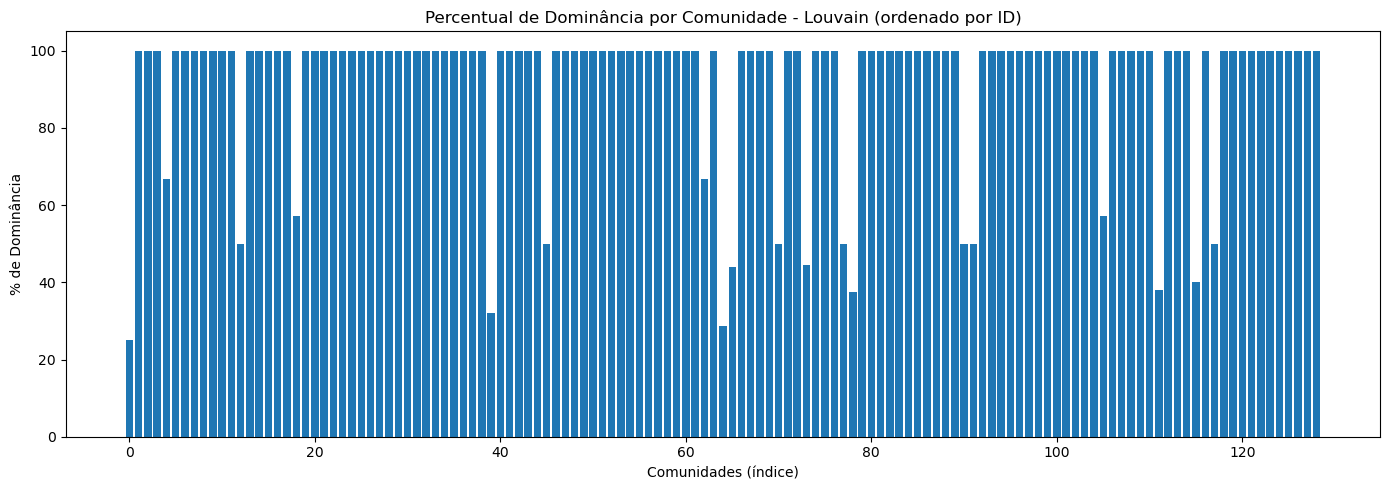


-- Algoritmo: Naive Greedy Modularity | n_com=127 | modularity=0.6178927493862559
Top comunidades por % dominante (primeiras 5):
 com#11 size=3 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#14 size=3 dominant_group=c712c1b704c22bd0cef50bc06125cdbd pct=100.00% missing=0
 com#15 size=2 dominant_group=5b10d7739171149be6d9961e3350c071 pct=100.00% missing=0
 com#16 size=2 dominant_group=5b10d7739171149be6d9961e3350c071 pct=100.00% missing=0
 com#21 size=1 dominant_group=4d3712f5a117e36180d4b4cbd07c540e pct=100.00% missing=0


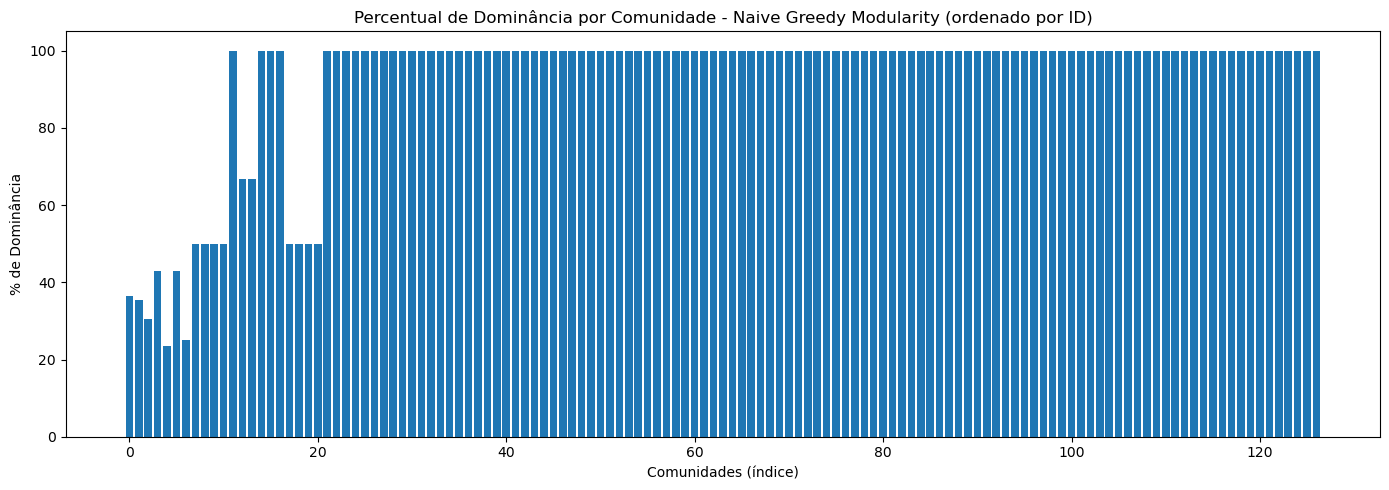


-- Algoritmo: Greedy Modularity | n_com=127 | modularity=0.6176819212533499
Top comunidades por % dominante (primeiras 5):
 com#11 size=3 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#13 size=3 dominant_group=c712c1b704c22bd0cef50bc06125cdbd pct=100.00% missing=0
 com#16 size=2 dominant_group=5b10d7739171149be6d9961e3350c071 pct=100.00% missing=0
 com#17 size=2 dominant_group=5b10d7739171149be6d9961e3350c071 pct=100.00% missing=0
 com#21 size=1 dominant_group=4d3712f5a117e36180d4b4cbd07c540e pct=100.00% missing=0


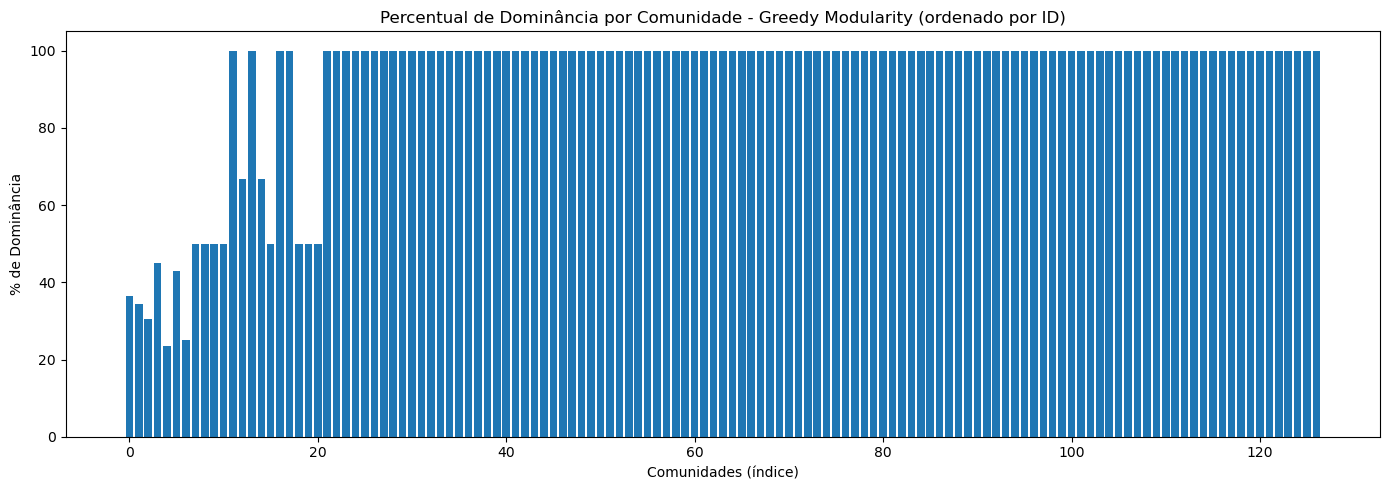

In [52]:
# === Análise da relação comunidade x grupo para o grafo 'Geral' ===

graph_name = 'Geral'
df_res = all_results[graph_name]  # recupera os resultados desse grafo

print(f"\n\n===== Analisando top-3 resultados para {graph_name} =====")
top3 = df_res.sort_values(by='modularity', ascending=False).head(3)

reports = {}  # salvar o resultado final da análise (opcional)
reports[graph_name] = []

for idx, row in top3.iterrows():
    alg = row['algorithm']
    comps = row['communities']
    info = row['info']
    print(f"\n-- Algoritmo: {alg} | n_com={row['n_communities']} | modularity={row['modularity']}")
    
    # Analisa as comunidades em relação aos grupos
    analysis = analyze_community_group_overlap(comps, node2groups)
    
    # Print resumo das 5 principais comunidades em termos de dominância
    print("Top comunidades por % dominante (primeiras 5):")
    for c in analysis[:5]:
        print(f" com#{c['community_id']:02d} size={c['size']} dominant_group={c['dominant_group']} pct={c['pct_dominant']:.2f}% missing={c['missing_group_info']}")
    
    # Salvar para futura referência (opcional)
    reports[graph_name].append({
        'algorithm': alg,
        'modularity': row['modularity'],
        'partition_coverage': row['partition_coverage'],
        'partition_performance': row['partition_performance'],
        'info': info,
        'community_analysis': analysis
    })

    plot_pct_dominance(analysis, title=f"Percentual de Dominância por Comunidade - {alg}", sort_by="id")

**Análise Grafo Desinformacao - Amostrado 10%**



===== Analisando top-3 resultados para Desinformacao =====

-- Algoritmo: Louvain | n_com=42 | modularity=0.7209010915571397
Top comunidades por % dominante (primeiras 5):
 com#00 size=2 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#01 size=1 dominant_group=12283e08a2eb5789201e105b34489ee7 pct=100.00% missing=0
 com#02 size=1 dominant_group=28833d567e79c4f5e4eb48bc0f3f7102 pct=100.00% missing=0
 com#05 size=1 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#06 size=1 dominant_group=55c570078a617013228ce12e4032cd28 pct=100.00% missing=0


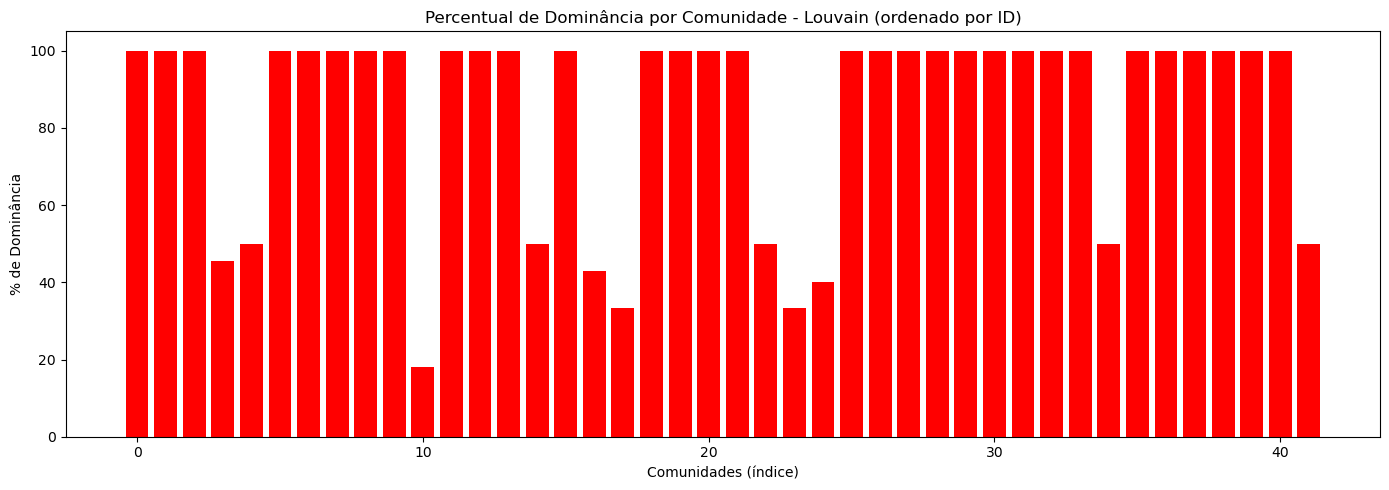


-- Algoritmo: Greedy Modularity | n_com=43 | modularity=0.7135219425261751
Top comunidades por % dominante (primeiras 5):
 com#08 size=2 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#13 size=1 dominant_group=12283e08a2eb5789201e105b34489ee7 pct=100.00% missing=0
 com#14 size=1 dominant_group=28833d567e79c4f5e4eb48bc0f3f7102 pct=100.00% missing=0
 com#15 size=1 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#16 size=1 dominant_group=55c570078a617013228ce12e4032cd28 pct=100.00% missing=0


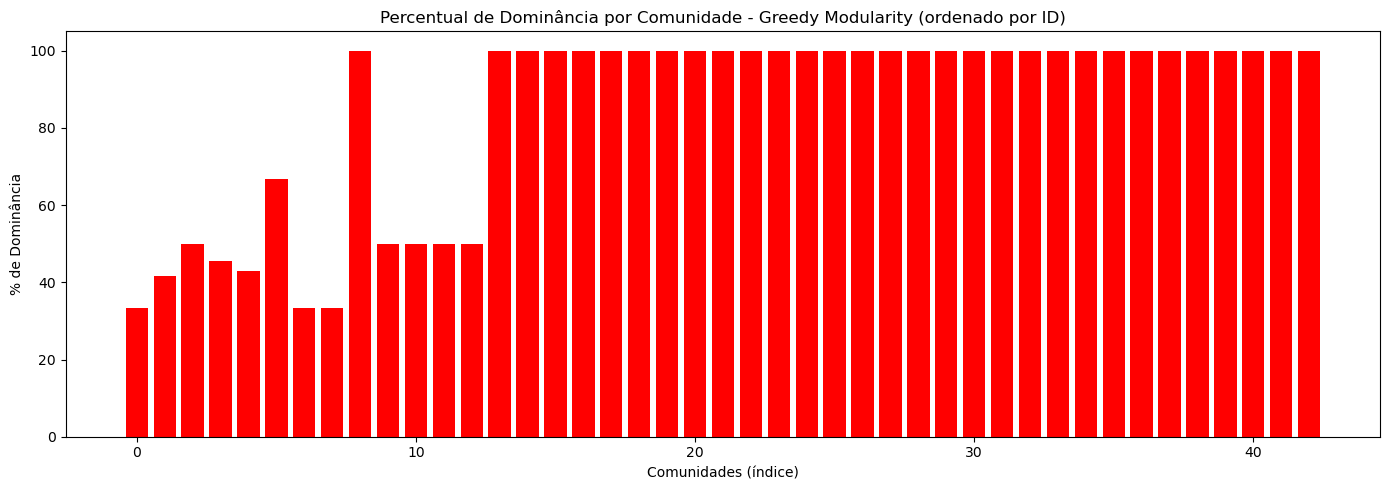


-- Algoritmo: Naive Greedy Modularity | n_com=43 | modularity=0.7135219425261751
Top comunidades por % dominante (primeiras 5):
 com#08 size=2 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#13 size=1 dominant_group=12283e08a2eb5789201e105b34489ee7 pct=100.00% missing=0
 com#14 size=1 dominant_group=28833d567e79c4f5e4eb48bc0f3f7102 pct=100.00% missing=0
 com#15 size=1 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#16 size=1 dominant_group=55c570078a617013228ce12e4032cd28 pct=100.00% missing=0


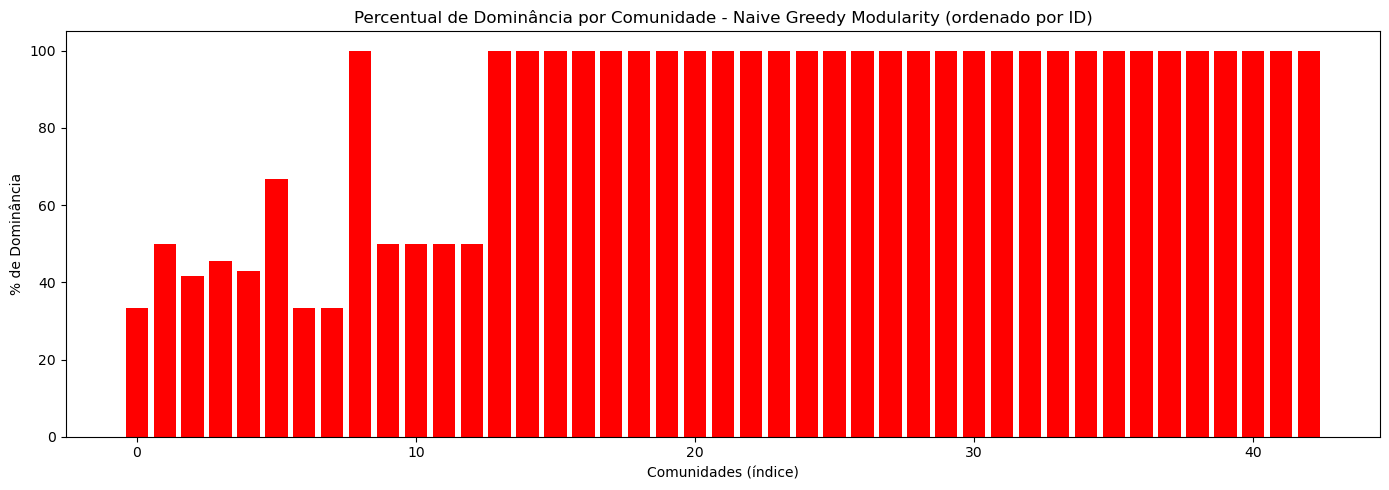

In [53]:
# === Análise da relação comunidade x grupo para o grafo 'Desinformacao' ===

graph_name = 'Desinformacao'
df_res = all_results[graph_name]  # recupera os resultados desse grafo

print(f"\n\n===== Analisando top-3 resultados para {graph_name} =====")
top3 = df_res.sort_values(by='modularity', ascending=False).head(3)

reports = {}  # salvar o resultado final da análise (opcional)
reports[graph_name] = []

for idx, row in top3.iterrows():
    alg = row['algorithm']
    comps = row['communities']
    info = row['info']
    print(f"\n-- Algoritmo: {alg} | n_com={row['n_communities']} | modularity={row['modularity']}")
    
    # Analisa as comunidades em relação aos grupos
    analysis = analyze_community_group_overlap(comps, node2groups)
    
    # Print resumo das 5 principais comunidades em termos de dominância
    print("Top comunidades por % dominante (primeiras 5):")
    for c in analysis[:5]:
        print(f" com#{c['community_id']:02d} size={c['size']} dominant_group={c['dominant_group']} pct={c['pct_dominant']:.2f}% missing={c['missing_group_info']}")
    
    # Salvar para futura referência (opcional)
    reports[graph_name].append({
        'algorithm': alg,
        'modularity': row['modularity'],
        'partition_coverage': row['partition_coverage'],
        'partition_performance': row['partition_performance'],
        'info': info,
        'community_analysis': analysis
    })

    plot_pct_dominance(analysis, title=f"Percentual de Dominância por Comunidade - {alg}", sort_by="id", color='red')

**Análise Grafo Viral - Amostrado 10%**



===== Analisando top-3 resultados para Viral =====

-- Algoritmo: Louvain | n_com=35 | modularity=0.6074485402226423
Top comunidades por % dominante (primeiras 5):
 com#00 size=1 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#01 size=1 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#03 size=1 dominant_group=aeb1fd3ed067212fcaad053d653e1a06 pct=100.00% missing=0
 com#04 size=1 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#07 size=1 dominant_group=b8a8737812c7fd7d3e0bdbb65ef6306f pct=100.00% missing=0


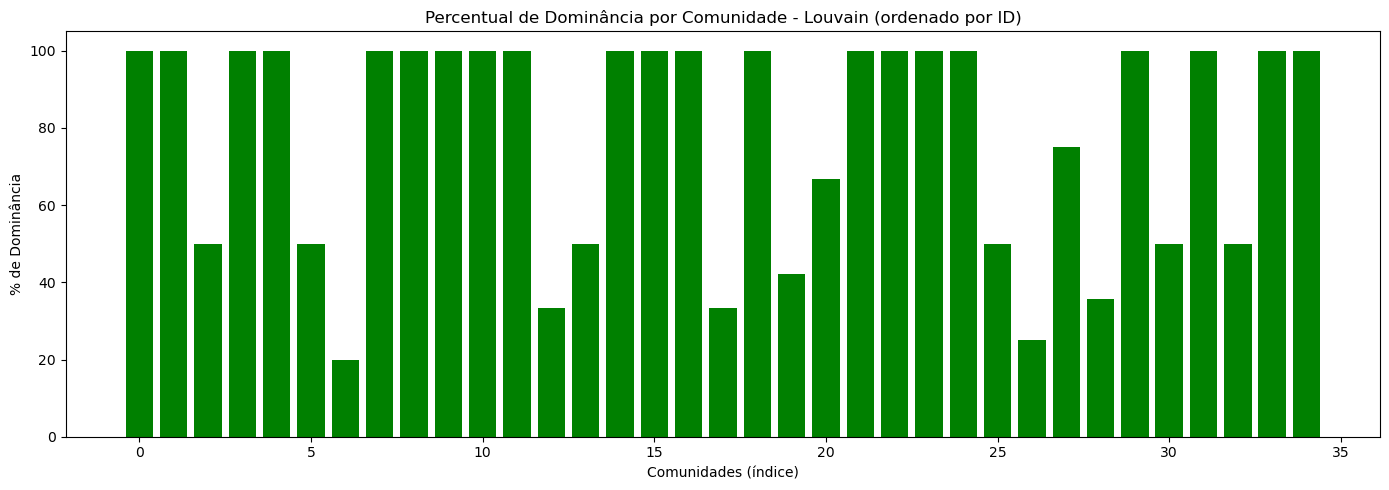


-- Algoritmo: Greedy Modularity | n_com=37 | modularity=0.5804715395925226
Top comunidades por % dominante (primeiras 5):
 com#08 size=3 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#14 size=2 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#16 size=2 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#18 size=2 dominant_group=c773db3b22b0534dc28c44f0f8a721ca pct=100.00% missing=0
 com#20 size=1 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0


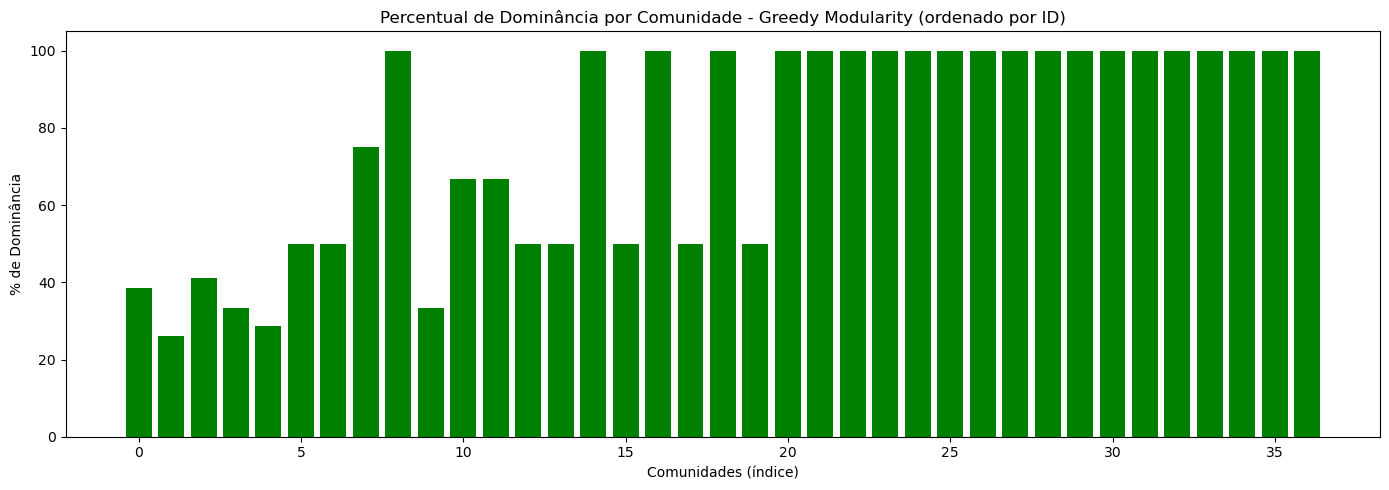


-- Algoritmo: Naive Greedy Modularity | n_com=37 | modularity=0.5804715395925226
Top comunidades por % dominante (primeiras 5):
 com#09 size=3 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#14 size=2 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#15 size=2 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#17 size=2 dominant_group=c773db3b22b0534dc28c44f0f8a721ca pct=100.00% missing=0
 com#20 size=1 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0


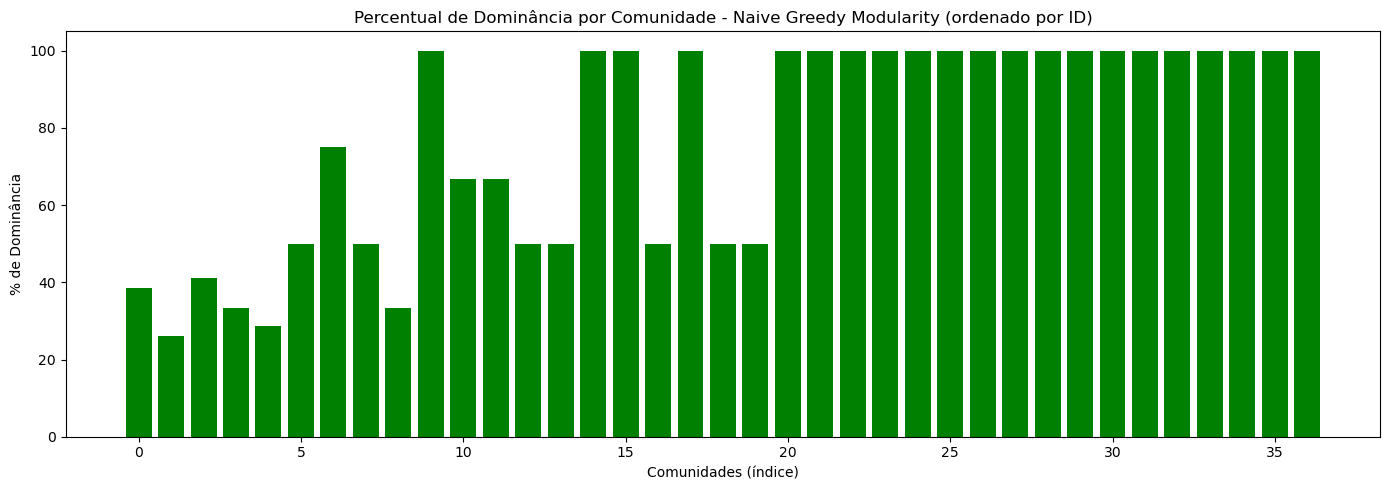

In [54]:
# === Análise da relação comunidade x grupo para o grafo 'Viral' ===

graph_name = 'Viral'
df_res = all_results[graph_name]  # recupera os resultados desse grafo

print(f"\n\n===== Analisando top-3 resultados para {graph_name} =====")
top3 = df_res.sort_values(by='modularity', ascending=False).head(3)

reports = {}  # salvar o resultado final da análise (opcional)
reports[graph_name] = []

for idx, row in top3.iterrows():
    alg = row['algorithm']
    comps = row['communities']
    info = row['info']
    print(f"\n-- Algoritmo: {alg} | n_com={row['n_communities']} | modularity={row['modularity']}")
    
    # Analisa as comunidades em relação aos grupos
    analysis = analyze_community_group_overlap(comps, node2groups)
    
    # Print resumo das 5 principais comunidades em termos de dominância
    print("Top comunidades por % dominante (primeiras 5):")
    for c in analysis[:5]:
        print(f" com#{c['community_id']:02d} size={c['size']} dominant_group={c['dominant_group']} pct={c['pct_dominant']:.2f}% missing={c['missing_group_info']}")
    
    # Salvar para futura referência (opcional)
    reports[graph_name].append({
        'algorithm': alg,
        'modularity': row['modularity'],
        'partition_coverage': row['partition_coverage'],
        'partition_performance': row['partition_performance'],
        'info': info,
        'community_analysis': analysis
    })

    plot_pct_dominance(analysis, title=f"Percentual de Dominância por Comunidade - {alg}", sort_by="id", color='green')


**Salvando Resultados**

In [ ]:
# === Salvar resultados (opcional) ===
import json
# salvar sumários em CSVs e relatório detalhado em JSON
for graph_name, df_res in all_results.items():
    fname = f"summary_{graph_name}.csv"
    df_res_drop = df_res.copy()
    # remover coluna 'communities' antes de salvar CSV (json será salvo abaixo)
    if 'communities' in df_res_drop.columns:
        df_res_drop = df_res_drop.drop(columns=['communities'])
    df_res_drop.to_csv(fname, index=False)
    print(f"Salvo {fname}")

# salvar reports detalhados em JSON
with open("community_reports.json", "w", encoding='utf-8') as f:
    json.dump(reports, f, ensure_ascii=False, indent=2)
print("Salvo community_reports.json")

#### Executando alguns dos algorítmos considerando os grafos completos.

Além da execução completa em amostras de 10% dos grafos, também foi realizada uma **versão rápida** dos testes utilizando apenas três algoritmos — *Louvain*, *Fast Label Propagation* e *Greedy Modularity*. Essa etapa tem o objetivo de **avaliar o comportamento das comunidades nos grafos completos**, utilizando métodos que apresentam **bom equilíbrio entre desempenho e qualidade dos resultados**, permitindo uma análise mais realista sem comprometer o tempo de execução.

In [ ]:
graph_map = {
    'Geral': G_geral,
    'Desinformacao': G_desinfo,
    'Viral': G_viral
}

all_results_completo = {}

for name, G in graph_map.items():
    print(f"\n\n===== Rodando algoritmos em {name} =====")
    res = run_all_algorithms(G, modo='rapido', params=None)
    # calcula métricas para cada resultado
    summary_rows = []
    Gu = G.to_undirected()
    for alg_name, (comps, info) in res.items():
        if not comps:
            summary_rows.append({
                'algorithm': alg_name,
                'n_communities': 0,
                'modularity': None,
                'partition_coverage': None,
                'partition_performance': None,
                'info': info
            })
            print(f"- {alg_name}: falhou/nenhuma comunidade. Info: {info}")
            continue
        try:
            mod = modularity(Gu, comps)
        except Exception as e:
            mod = None
        try:
            cov, perf = partition_quality(Gu, comps)
        except Exception as e:
            cov, perf = (None, None)
        summary_rows.append({
            'algorithm': alg_name,
            'n_communities': len(comps),
            'modularity': mod,
            'partition_coverage': cov,
            'partition_performance': perf,
            'info': info,
            'communities': comps
        })
        print(f"- {alg_name}: n_com={len(comps)} modularity={mod} coverage={cov} performance={perf}")
    df_summary = pd.DataFrame(summary_rows).sort_values(by=['modularity'], ascending=False)
    all_results_completo[name] = df_summary
    display(df_summary)



===== Rodando algoritmos em Geral =====
- Greedy Modularity: n_com=150 modularity=0.38368744722035886 coverage=0.6342455537727961 performance=0.8303733348364429
- Fast Label Propagation: n_com=182 modularity=0.08551463573816115 coverage=0.9840907550111861 performance=0.4157024845148401
- Louvain: n_com=133 modularity=0.4456910666379403 coverage=0.564100246322117 performance=0.9078741646781779


,algorithm,n_communities,modularity,partition_coverage,partition_performance,info,communities
2,Louvain,133,0.445691,0.564100,0.907874,Louvain retornou 133 comunidades,"[{b1fd7b7cc7bbd09945b9f40e411885da, d5b6f45e37..."
0,Greedy Modularity,150,0.383687,0.634246,0.830373,Greedy Modularity retornou 150 comunidades,"[{f547bf33a6175e88feee18c586bb105f, 1705a92991..."
1,Fast Label Propagation,182,0.085515,0.984091,0.415702,Fast (Async) Label Propagation retornou 182 co...,"[{f547bf33a6175e88feee18c586bb105f, 960a5bdec7..."




===== Rodando algoritmos em Desinformacao =====
- Greedy Modularity: n_com=41 modularity=0.47411573786778005 coverage=0.647544902000956 performance=0.8528347224596081
- Fast Label Propagation: n_com=104 modularity=0.5054731704208685 coverage=0.6211158915522775 performance=0.9565449798752635
- Louvain: n_com=38 modularity=0.5399753440469275 coverage=0.6713105237997679 performance=0.9011609007034441


,algorithm,n_communities,modularity,partition_coverage,partition_performance,info,communities
2,Louvain,38,0.539975,0.671311,0.901161,Louvain retornou 38 comunidades,"[{7bbd940e47b3a7ede22454a115821c48, 97b321fd3f..."
1,Fast Label Propagation,104,0.505473,0.621116,0.956545,Fast (Async) Label Propagation retornou 104 co...,"[{2fc4d33814b356af416a214ef7a9b78d, 7628598a0f..."
0,Greedy Modularity,41,0.474116,0.647545,0.852835,Greedy Modularity retornou 41 comunidades,"[{363760b99877dc6b2170a9f642b8500f, 2b34bcd37c..."




===== Rodando algoritmos em Viral =====
- Greedy Modularity: n_com=28 modularity=0.39522991706074145 coverage=0.5781039860359973 performance=0.8676957454882017
- Fast Label Propagation: n_com=33 modularity=0.09989621797623788 coverage=0.9683806907602942 performance=0.39852996388152173
- Louvain: n_com=28 modularity=0.4872410189004392 coverage=0.6143302715540676 performance=0.9167769227217151


,algorithm,n_communities,modularity,partition_coverage,partition_performance,info,communities
2,Louvain,28,0.487241,0.614330,0.916777,Louvain retornou 28 comunidades,"[{46c0ca3f9777deb8dc2e63289f1f2616, d93a92fde2..."
0,Greedy Modularity,28,0.395230,0.578104,0.867696,Greedy Modularity retornou 28 comunidades,"[{46c0ca3f9777deb8dc2e63289f1f2616, 1705a92991..."
1,Fast Label Propagation,33,0.099896,0.968381,0.398530,Fast (Async) Label Propagation retornou 33 com...,"[{a0e68de8f5755418ab1f5df7adbc48d6, ef1e2b1750..."


In [77]:
import pickle

with open(f"all_results_completo.pkl", "wb") as f:
    pickle.dump(all_results_completo, f)

In [20]:
with open("all_results_completo.pkl", "rb") as f:
    all_results_completo = pickle.load(f)

**Análise Grafo Geral Completo**



===== Analisando top-3 resultados para Geral =====

-- Algoritmo: Louvain | n_com=133 | modularity=0.4456910666379403
Top comunidades por % dominante (primeiras 5):
 com#02 size=2 dominant_group=e56ec342fc599ebb4ed89655eb6f03aa pct=100.00% missing=0
 com#06 size=3 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#07 size=2 dominant_group=c8f2de56550ed0bf85249608b7ead93d pct=100.00% missing=0
 com#08 size=2 dominant_group=e56ec342fc599ebb4ed89655eb6f03aa pct=100.00% missing=0
 com#09 size=4 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0


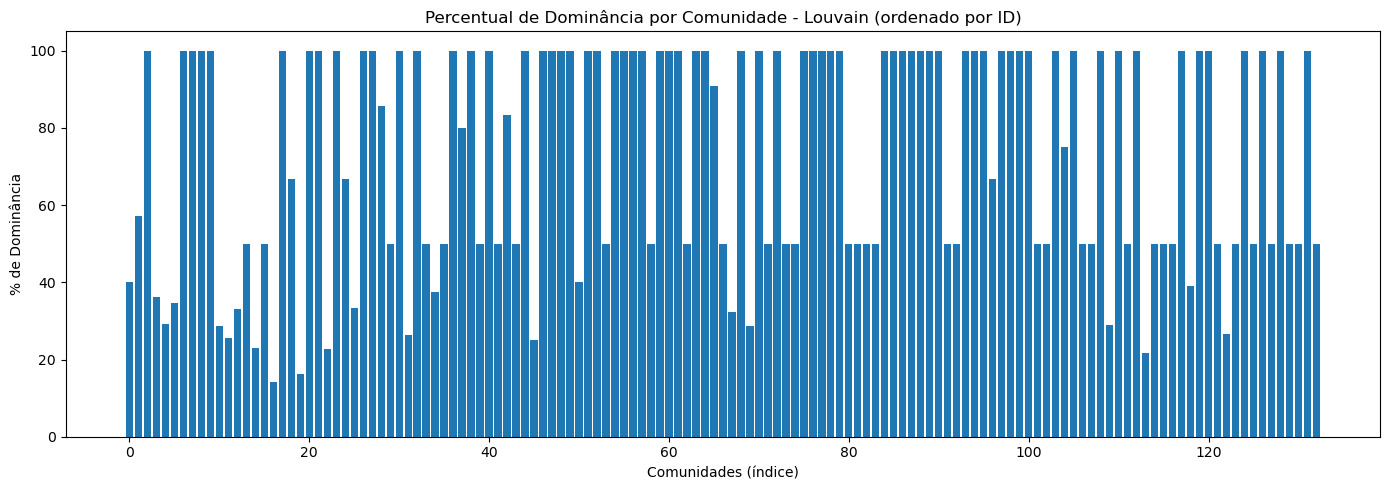


-- Algoritmo: Greedy Modularity | n_com=150 | modularity=0.38368744722035886
Top comunidades por % dominante (primeiras 5):
 com#10 size=18 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#13 size=14 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#14 size=11 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#17 size=9 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#26 size=5 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0


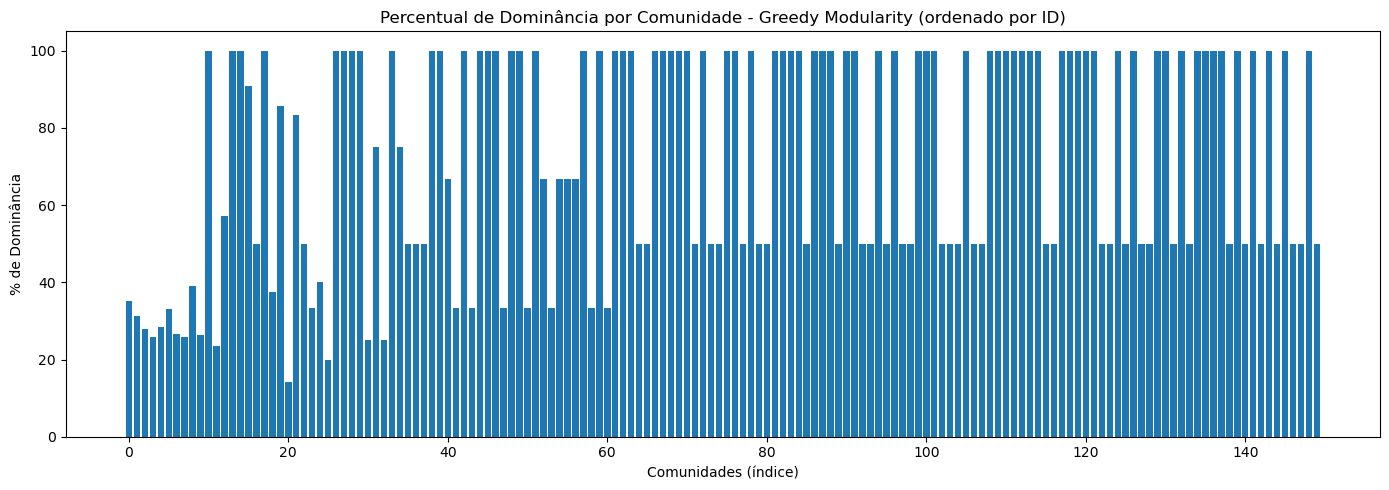


-- Algoritmo: Fast Label Propagation | n_com=182 | modularity=0.08551463573816115
Top comunidades por % dominante (primeiras 5):
 com#03 size=2 dominant_group=e56ec342fc599ebb4ed89655eb6f03aa pct=100.00% missing=0
 com#07 size=3 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#09 size=2 dominant_group=c8f2de56550ed0bf85249608b7ead93d pct=100.00% missing=0
 com#10 size=2 dominant_group=e56ec342fc599ebb4ed89655eb6f03aa pct=100.00% missing=0
 com#11 size=4 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0


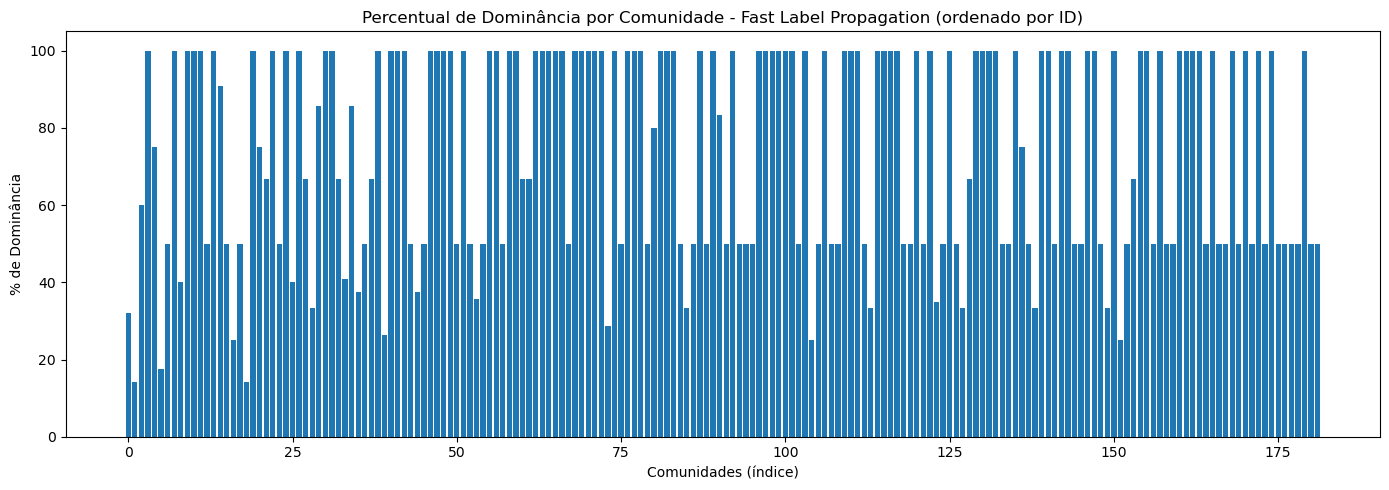

In [56]:
# === Análise da relação comunidade x grupo para o grafo 'Geral' ===

graph_name = 'Geral'
df_res = all_results_completo[graph_name]  # recupera os resultados desse grafo

print(f"\n\n===== Analisando top-3 resultados para {graph_name} =====")
top3 = df_res.sort_values(by='modularity', ascending=False).head(3)

for idx, row in top3.iterrows():
    alg = row['algorithm']
    comps = row['communities']
    info = row['info']
    print(f"\n-- Algoritmo: {alg} | n_com={row['n_communities']} | modularity={row['modularity']}")
    
    # Analisa as comunidades em relação aos grupos
    analysis = analyze_community_group_overlap(comps, node2groups)
    
    # Print resumo das 5 principais comunidades em termos de dominância
    print("Top comunidades por % dominante (primeiras 5):")
    for c in analysis[:5]:
        print(f" com#{c['community_id']:02d} size={c['size']} dominant_group={c['dominant_group']} pct={c['pct_dominant']:.2f}% missing={c['missing_group_info']}")

    #plot_pct_dominance(analysis, title=f"Percentual de Dominância por Comunidade - {alg}", sort_by="dominance")
    plot_pct_dominance(analysis, title=f"Percentual de Dominância por Comunidade - {alg}", sort_by="id")


**Análise Grafo Desinformacao Completo**



===== Analisando top-3 resultados para Desinformacao =====

-- Algoritmo: Louvain | n_com=38 | modularity=0.5399753440469275
Top comunidades por % dominante (primeiras 5):
 com#01 size=2 dominant_group=c8f2de56550ed0bf85249608b7ead93d pct=100.00% missing=0
 com#04 size=3 dominant_group=138c8ebb0425440a619f3cf35a09e784 pct=100.00% missing=0
 com#05 size=2 dominant_group=4b07f6441df07b2f5da8c349eb29e340 pct=100.00% missing=0
 com#08 size=2 dominant_group=aeb1fd3ed067212fcaad053d653e1a06 pct=100.00% missing=0
 com#15 size=2 dominant_group=c773db3b22b0534dc28c44f0f8a721ca pct=100.00% missing=0


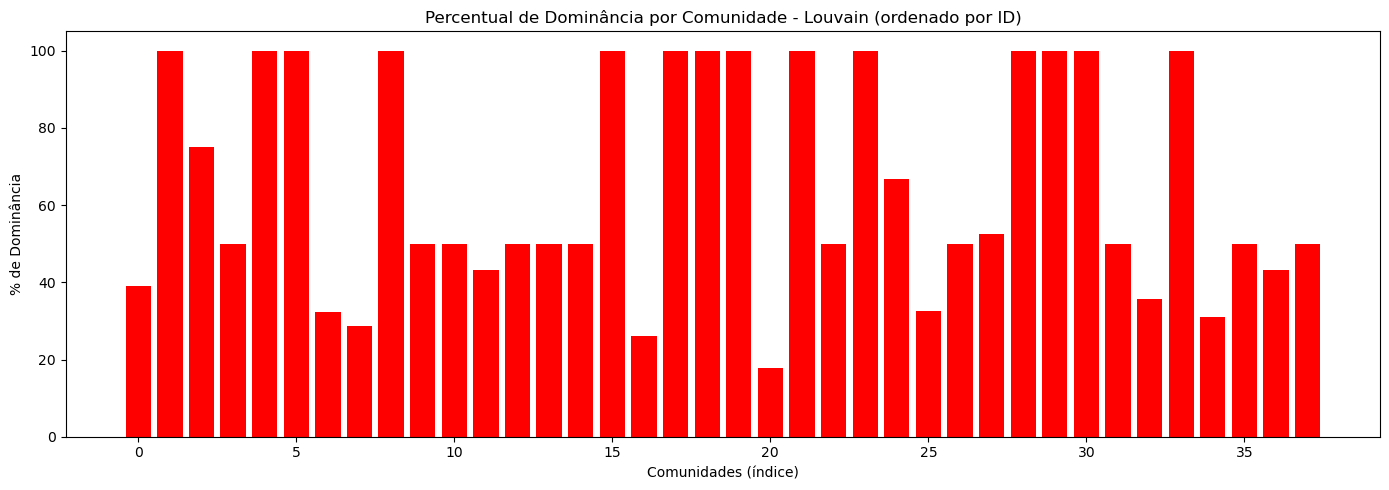


-- Algoritmo: Fast Label Propagation | n_com=104 | modularity=0.5054731704208685
Top comunidades por % dominante (primeiras 5):
 com#15 size=2 dominant_group=c8f2de56550ed0bf85249608b7ead93d pct=100.00% missing=0
 com#16 size=4 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#23 size=3 dominant_group=138c8ebb0425440a619f3cf35a09e784 pct=100.00% missing=0
 com#25 size=2 dominant_group=4b07f6441df07b2f5da8c349eb29e340 pct=100.00% missing=0
 com#28 size=2 dominant_group=aeb1fd3ed067212fcaad053d653e1a06 pct=100.00% missing=0


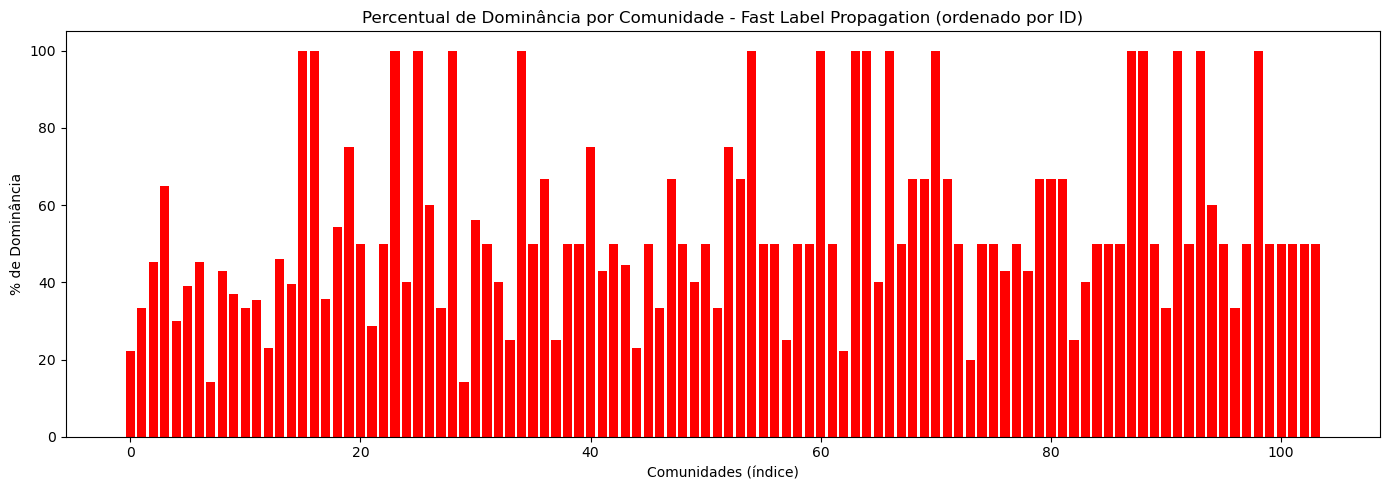


-- Algoritmo: Greedy Modularity | n_com=41 | modularity=0.47411573786778005
Top comunidades por % dominante (primeiras 5):
 com#12 size=4 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#15 size=4 dominant_group=c4f3f7c212b63111fde79d255ae4f754 pct=100.00% missing=0
 com#17 size=3 dominant_group=138c8ebb0425440a619f3cf35a09e784 pct=100.00% missing=0
 com#19 size=2 dominant_group=c8f2de56550ed0bf85249608b7ead93d pct=100.00% missing=0
 com#21 size=2 dominant_group=4b07f6441df07b2f5da8c349eb29e340 pct=100.00% missing=0


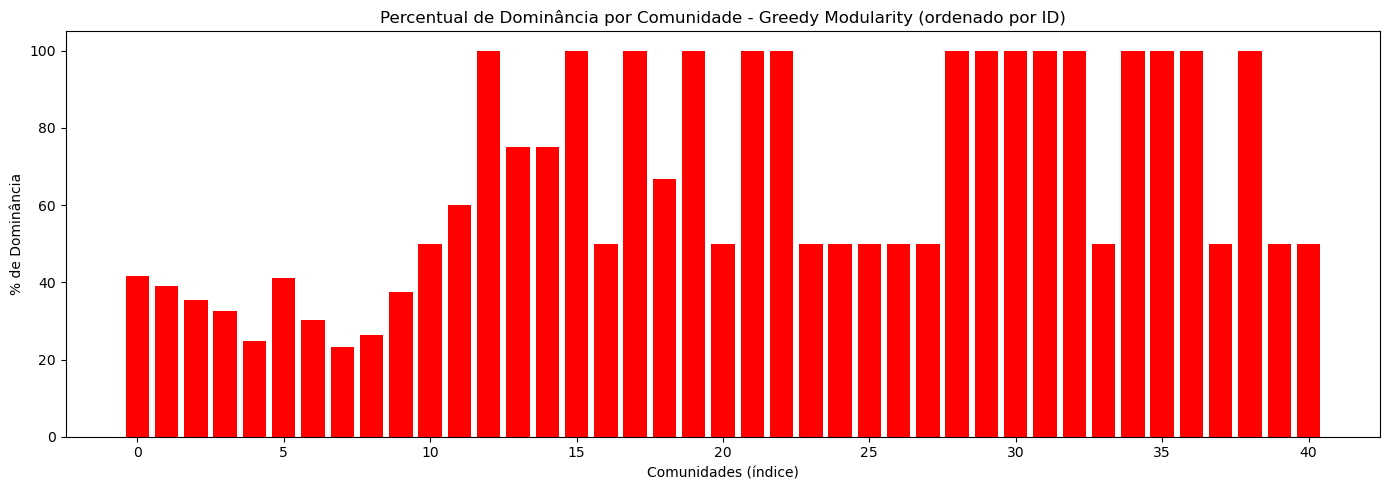

In [45]:
# === Análise da relação comunidade x grupo para o grafo 'Desinformacao' ===

graph_name = 'Desinformacao'
df_res = all_results_completo[graph_name]  # recupera os resultados desse grafo

print(f"\n\n===== Analisando top-3 resultados para {graph_name} =====")
top3 = df_res.sort_values(by='modularity', ascending=False).head(3)

for idx, row in top3.iterrows():
    alg = row['algorithm']
    comps = row['communities']
    info = row['info']
    print(f"\n-- Algoritmo: {alg} | n_com={row['n_communities']} | modularity={row['modularity']}")
    
    # Analisa as comunidades em relação aos grupos
    analysis = analyze_community_group_overlap(comps, node2groups)
    
    # Print resumo das 5 principais comunidades em termos de dominância
    print("Top comunidades por % dominante (primeiras 5):")
    for c in analysis[:5]:
        print(f" com#{c['community_id']:02d} size={c['size']} dominant_group={c['dominant_group']} pct={c['pct_dominant']:.2f}% missing={c['missing_group_info']}")

    plot_pct_dominance(analysis, title=f"Percentual de Dominância por Comunidade - {alg}", sort_by="id", color='red')


**Análise Grafo Viral Completo**



===== Analisando top-3 resultados para Viral =====

-- Algoritmo: Louvain | n_com=28 | modularity=0.4872410189004392
Top comunidades por % dominante (primeiras 5):
 com#02 size=3 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#03 size=2 dominant_group=e56ec342fc599ebb4ed89655eb6f03aa pct=100.00% missing=0
 com#04 size=4 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#13 size=3 dominant_group=aeb1fd3ed067212fcaad053d653e1a06 pct=100.00% missing=0
 com#14 size=3 dominant_group=d4883a30771f075fd28598af6e76e748 pct=100.00% missing=0


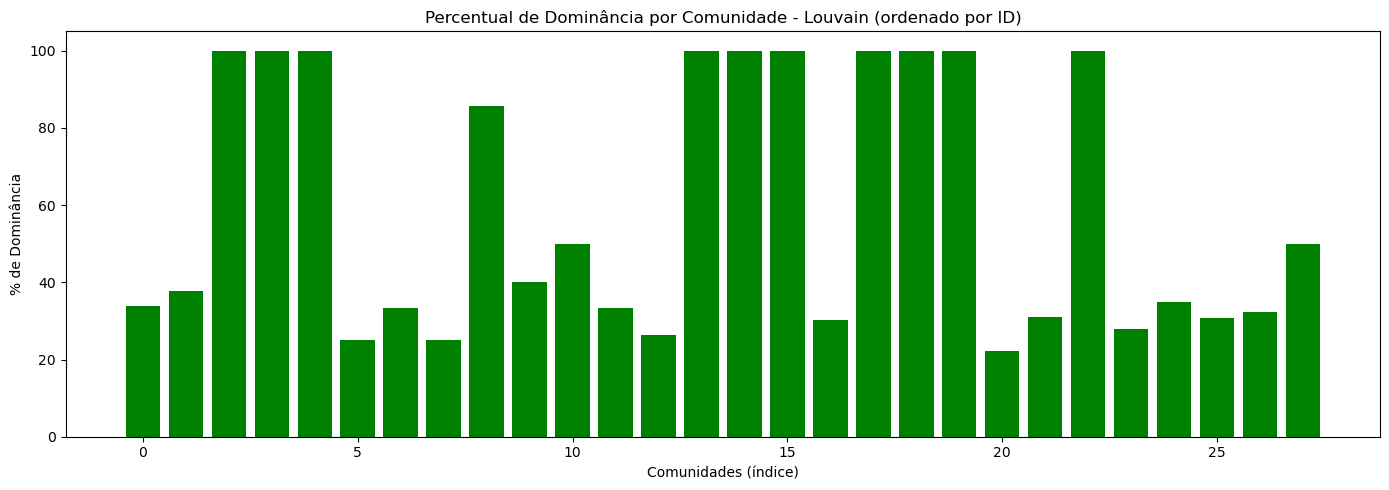


-- Algoritmo: Greedy Modularity | n_com=28 | modularity=0.39522991706074145
Top comunidades por % dominante (primeiras 5):
 com#11 size=18 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#14 size=14 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#15 size=11 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#16 size=9 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0
 com#18 size=5 dominant_group=eff93933ee611fcb65b70c399f771a5b pct=100.00% missing=0


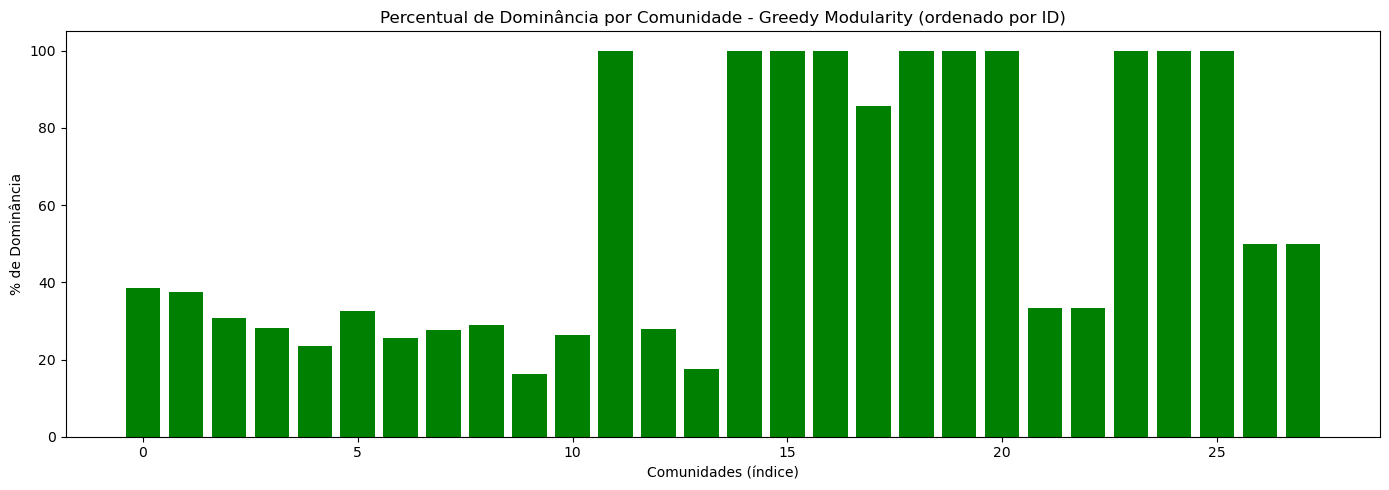


-- Algoritmo: Fast Label Propagation | n_com=33 | modularity=0.09989621797623788
Top comunidades por % dominante (primeiras 5):
 com#02 size=3 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#04 size=2 dominant_group=e56ec342fc599ebb4ed89655eb6f03aa pct=100.00% missing=0
 com#05 size=4 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#08 size=6 dominant_group=857cd5311da1bdc15eb9e6918a47c6c6 pct=100.00% missing=0
 com#13 size=3 dominant_group=aeb1fd3ed067212fcaad053d653e1a06 pct=100.00% missing=0


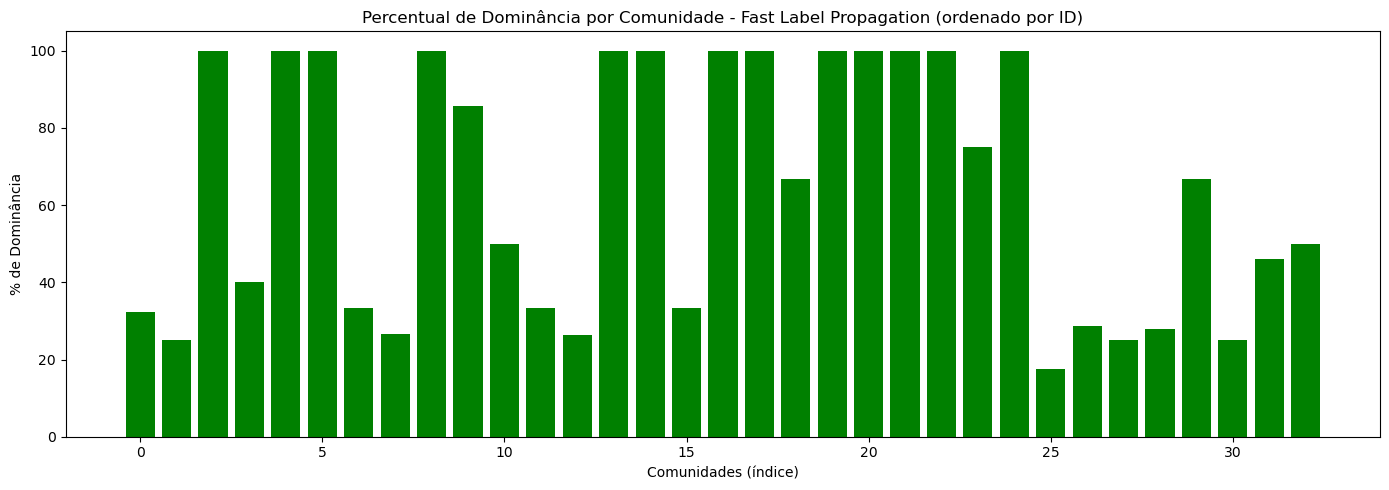

In [46]:
# === Análise da relação comunidade x grupo para o grafo 'Viral' ===

graph_name = 'Viral'
df_res = all_results_completo[graph_name]  # recupera os resultados desse grafo

print(f"\n\n===== Analisando top-3 resultados para {graph_name} =====")
top3 = df_res.sort_values(by='modularity', ascending=False).head(3)

for idx, row in top3.iterrows():
    alg = row['algorithm']
    comps = row['communities']
    info = row['info']
    print(f"\n-- Algoritmo: {alg} | n_com={row['n_communities']} | modularity={row['modularity']}")
    
    # Analisa as comunidades em relação aos grupos
    analysis = analyze_community_group_overlap(comps, node2groups)
    
    # Print resumo das 5 principais comunidades em termos de dominância
    print("Top comunidades por % dominante (primeiras 5):")
    for c in analysis[:5]:
        print(f" com#{c['community_id']:02d} size={c['size']} dominant_group={c['dominant_group']} pct={c['pct_dominant']:.2f}% missing={c['missing_group_info']}")

    plot_pct_dominance(analysis, title=f"Percentual de Dominância por Comunidade - {alg}", sort_by="id", color='green')


#### **Detecção de Comunidades usando o Gephi** (Grafos Completos)

O Gephi oferece diferentes métodos para identificar comunidades em grafos. Na seção **Detection Communities**, duas opções principais podem ser encontradas: **Modularity** e **Statistical Inference**.

- **Modularity (Modularidade):** Método que detecta comunidades maximizando a modularidade da rede — ou seja, busca grupos de nós que tenham mais conexões internas do que externas.

- **Statistical Inference (Inferência Estatística):** Método baseado em modelos estatísticos que identifica comunidades inferindo padrões de conexão na rede, buscando uma divisão que melhor explique a estrutura observada.

##### **Grafo Geral**

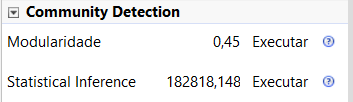

Modularity

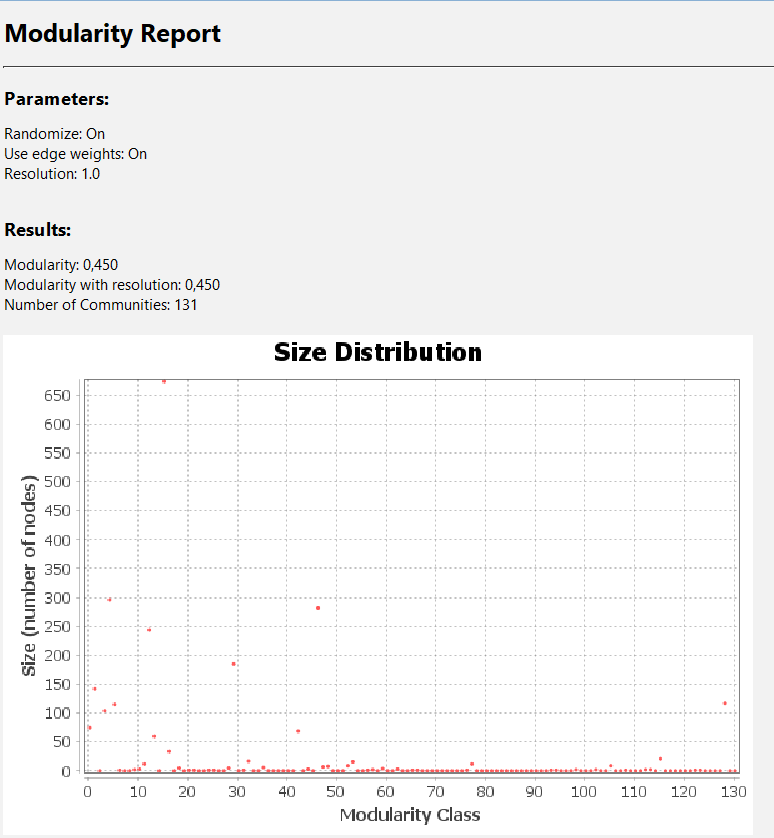

Statistical Inference

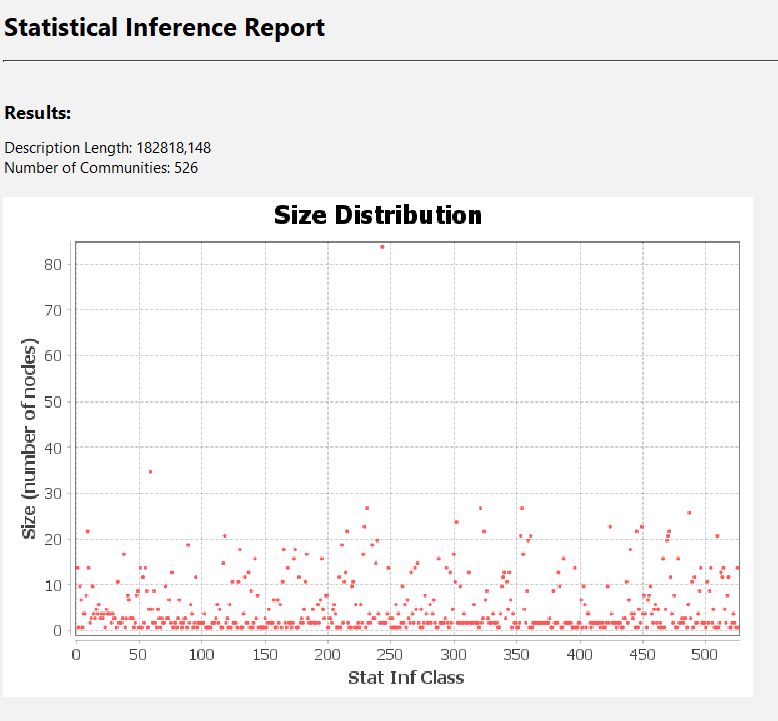

##### **Grafo Desinformação**

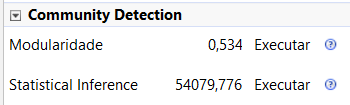

Modularity

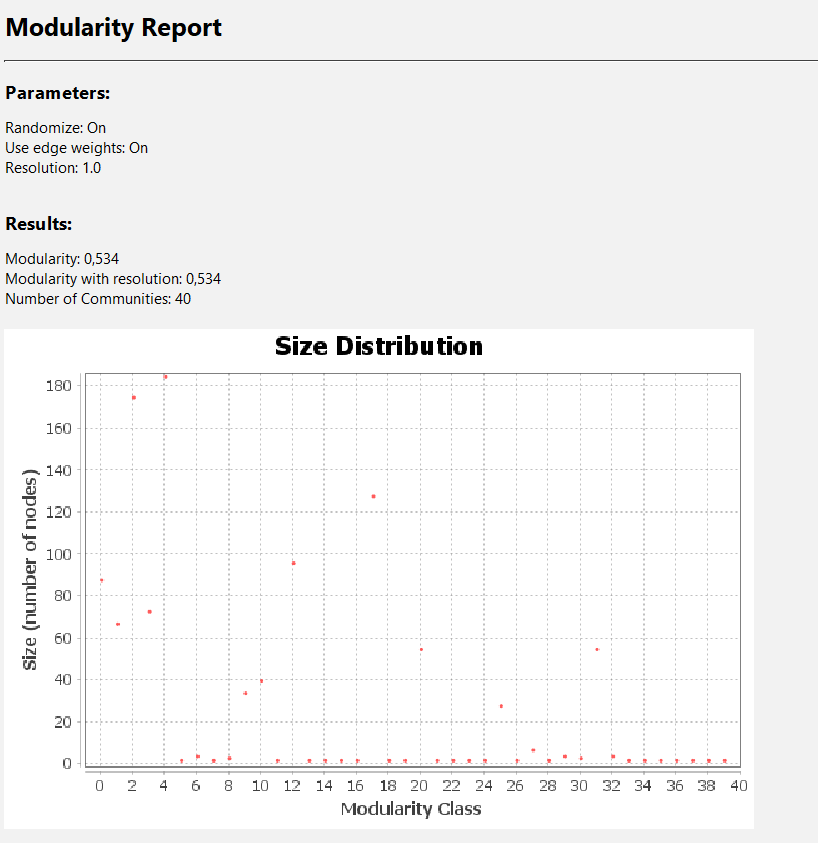

Statistical Inference

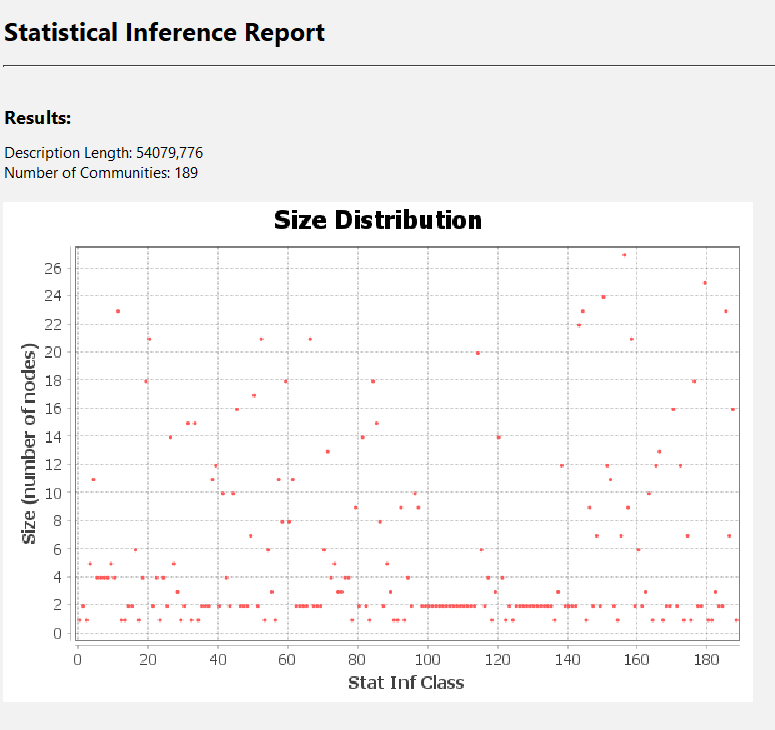

##### Grafo Viral

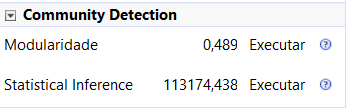

Modularity

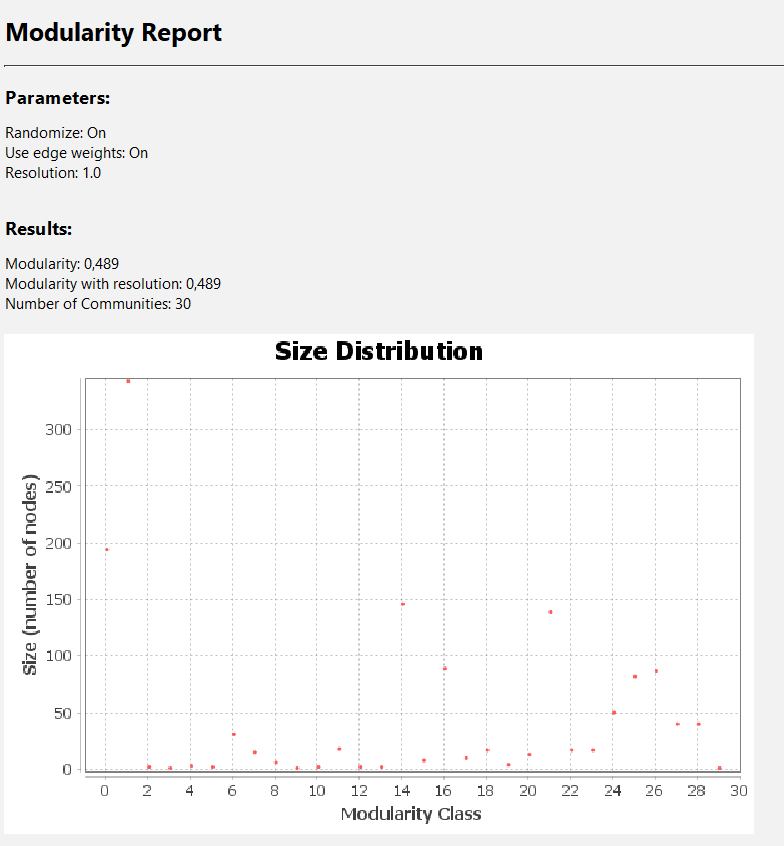

Statistical Inference

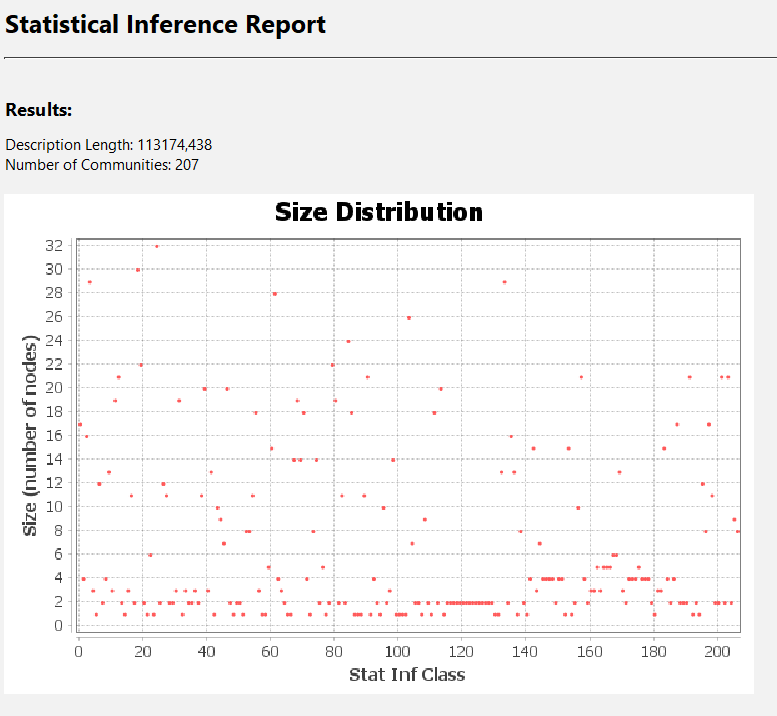